In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


بخش ۲- بارگذاری داده ها

In [3]:
import pandas as pd

tehran_path = '/content/drive/My Drive/DM-CA1/tehran.csv'
isfahan_path = '/content/drive/My Drive/DM-CA1/isfahan.csv'
mashhad_path = '/content/drive/My Drive/DM-CA1/mashhad.csv'
shiraz_path = '/content/drive/My Drive/DM-CA1/shiraz.csv'
zahedan_path = '/content/drive/My Drive/DM-CA1/zahedan.csv'
tehran = pd.read_csv(tehran_path)
isfahan = pd.read_csv(isfahan_path)
mashhad = pd.read_csv(mashhad_path)
shiraz = pd.read_csv(shiraz_path)
zahedan = pd.read_csv(zahedan_path)
print("Tehran Data:")
print(tehran.head())

print("\nIsfahan Data:")
print(isfahan.head())

print("\nMashhad Data:")
print(mashhad.head())

print("\nShiraz Data:")
print(shiraz.head())

print("\nZahedan Data:")
print(zahedan.head())

Tehran Data:
                                               title property size  \
0                     فروش واحدهای کوهک (برج و شخصی)           104   
1  واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...           140   
2     47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650            47   
3    85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی            85   
4          آپارتمان 115 متری 3 خواب مقابل پارک کوروش           115   

            total price     price per metr room count build year floor count  \
0  10٬300٬000٬000 تومان   99٬038٬000 تومان          2       1400   Not Found   
1  18٬500٬000٬000 تومان  132٬142٬000 تومان          3       1385   Not Found   
2   1٬650٬000٬000 تومان   35٬106٬000 تومان          1       1375   Not Found   
3  16٬300٬000٬000 تومان  191٬764٬000 تومان          2       1394   Not Found   
4  13٬850٬000٬000 تومان  120٬434٬000 تومان          3       1383           1   

  total floor                                    characteristics  \
0   Not Found    

In [4]:
print("Tehran Columns:", tehran.columns, len(tehran.columns))
print("Isfahan Columns:", isfahan.columns, len(isfahan.columns))
print("Mashhad Columns:", mashhad.columns, len(mashhad.columns))
print("Shiraz Columns:", shiraz.columns, len(shiraz.columns))
print("Zahedan Columns:", zahedan.columns, len(zahedan.columns))

Tehran Columns: Index(['title', 'property size', 'total price', 'price per metr', 'room count',
       'build year', 'floor count', 'total floor', 'characteristics',
       'features', 'description', 'url', 'crawl date'],
      dtype='object') 13
Isfahan Columns: Index(['Title', 'PropertySize', 'TotalPrice', 'PriceperMeter', 'RoomCount',
       'BuildYear', 'FloorNumber', 'TotalFloors', 'Characteristics',
       'Features', 'exchangeable', 'Description', 'URL', 'CrawlDate'],
      dtype='object') 14
Mashhad Columns: Index(['Title', 'PropertySize', 'TotalPrice', 'RoomCount', 'BuildYear',
       'FloorNumber', 'TotalFloors', 'Characteristics', 'Features',
       'Description', 'URL', 'CrawlDate'],
      dtype='object') 12
Shiraz Columns: Index(['Title', 'property size m2', 'TotalPrice', 'PriceperMeter', 'RoomCount',
       'BuildYear', 'FloorNumber', 'TotalFloors', 'Characteristics',
       'Features', 'Description', 'URL', 'CrawlDate'],
      dtype='object') 13
Zahedan Columns: Index(['

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۳ - تجمیع داده ها
<br><br>
 در این مرحله سعی کردم داده ها را تجمیع کنم که در این راه به چند مشکل برخوردم که در ادامه هر مشکل و راه حل مربوط به آن را به طور کامل شرح می دهم.
ابتدا اولین مشکل این بود که تعداد ستون های دیتا فریم شهرهای مختلف با هم برابر نبود، شهر مشهد ستون قیمت بر حسب متر مربع برای هر خانه را نداشت و شهر اصفهان هم ستون  exchangeable را به عنوان ستون اضافی داشت. با توجه به این که این ستون فقط و فقط در داده های شهر اصفهان موجود بود، این ستون را از دیتا فریم داده های اصفهان حذف کردم و ستون قیمت بر حسب متر مربع را هم به داده های شهر مشهد اضافه کردم. با توجه به این که مقادیر ستون قیمت بر حسب متر مربع در دیتافریم شهر مشهد بر اساس قیمت کل و متراژ خانه به دست می آمد، فعلا مقادیر این ستون را برابر NaN قرار دادم تا در ادامه بعد از تمیز کردن داده ها این ویژگی را محاسبه کنم.
در مرحله بعد نام ستون های شهر های مختلف را تغییر دادم و به یک شکل تبدیل کردم تا بتوانم با استفاده از متد concat در کتابخانه pandas دیتا فریم های مختلف را در یک دیتا فریم تجمیع کنم.


In [5]:

import numpy as np

del isfahan['exchangeable']

#بررسی ستون های هر دیتافریم
mashhad['pricepermeter'] = np.nan
print("Tehran Columns:", tehran.columns, len(tehran.columns))
print("Isfahan Columns:", isfahan.columns, len(isfahan.columns))
print("Mashhad Columns:", mashhad.columns, len(mashhad.columns))
print("Shiraz Columns:", shiraz.columns, len(shiraz.columns))
print("Zahedan Columns:", zahedan.columns, len(zahedan.columns))

Tehran Columns: Index(['title', 'property size', 'total price', 'price per metr', 'room count',
       'build year', 'floor count', 'total floor', 'characteristics',
       'features', 'description', 'url', 'crawl date'],
      dtype='object') 13
Isfahan Columns: Index(['Title', 'PropertySize', 'TotalPrice', 'PriceperMeter', 'RoomCount',
       'BuildYear', 'FloorNumber', 'TotalFloors', 'Characteristics',
       'Features', 'Description', 'URL', 'CrawlDate'],
      dtype='object') 13
Mashhad Columns: Index(['Title', 'PropertySize', 'TotalPrice', 'RoomCount', 'BuildYear',
       'FloorNumber', 'TotalFloors', 'Characteristics', 'Features',
       'Description', 'URL', 'CrawlDate', 'pricepermeter'],
      dtype='object') 13
Shiraz Columns: Index(['Title', 'property size m2', 'TotalPrice', 'PriceperMeter', 'RoomCount',
       'BuildYear', 'FloorNumber', 'TotalFloors', 'Characteristics',
       'Features', 'Description', 'URL', 'CrawlDate'],
      dtype='object') 13
Zahedan Columns: Index([

In [6]:
tehran = tehran.rename(columns={'title':'title', 'property size':'property_size', 'total price':'total_price','price per metr': 'price_per_meter','room count':'room_count', 'build year': 'build_year', 'floor count':'floor_count', 'total floor':'total_floor', 'characteristics':'characteristics', 'features':'features','description':'description' , 'url':'url', 'crawl date':'crawl_date'})
isfahan = isfahan.rename(columns={'Title':'title', 'PropertySize':'property_size', 'TotalPrice':'total_price','PriceperMeter':'price_per_meter','RoomCount':'room_count', 'BuildYear': 'build_year', 'FloorNumber':'floor_count', 'TotalFloors':'total_floor', 'Characteristics':'characteristics', 'Features':'features','Description':'description' ,'URL':'url', 'CrawlDate':'crawl_date'})
mashhad = mashhad.rename(columns={'Title':'title', 'PropertySize':'property_size', 'TotalPrice':'total_price','pricepermeter':'price_per_meter','RoomCount':'room_count', 'BuildYear': 'build_year', 'FloorNumber':'floor_count', 'TotalFloors':'total_floor', 'Characteristics':'characteristics', 'Features':'features','Description':'description', 'URL':'url', 'CrawlDate':'crawl_date'})
shiraz = shiraz.rename(columns={'Title':'title', 'property size m2':'property_size', 'TotalPrice':'total_price','PriceperMeter':'price_per_meter','RoomCount':'room_count', 'BuildYear': 'build_year', 'FloorNumber':'floor_count', 'TotalFloors':'total_floor', 'Characteristics':'characteristics', 'Features':'features','Description':'description', 'URL':'url', 'CrawlDate':'crawl_date'})
zahedan = zahedan.rename(columns={'Title':'title', 'PropertySize':'property_size', 'TotalPrice':'total_price','PriceperMeter':'price_per_meter','RoomCount':'room_count', 'BuildYear': 'build_year', 'FloorNumber':'floor_count', 'TotalFloors':'total_floor', 'Characteristics':'characteristics', 'Features':'features','Description':'description', 'URL':'url', 'CrawlDate':'crawl_date'})
tehran['city'] = 'tehran'
isfahan['city'] = 'isfahan'
mashhad['city'] = 'mashhad'
shiraz['city']= 'shiraz'
zahedan['city'] = 'zahedan'

print("Tehran Columns:", tehran.columns, len(tehran.columns))
print("Isfahan Columns:", isfahan.columns, len(isfahan.columns))
print("Mashhad Columns:", mashhad.columns, len(mashhad.columns))
print("Shiraz Columns:", shiraz.columns, len(shiraz.columns))
print("Zahedan Columns:", zahedan.columns, len(zahedan.columns))

Tehran Columns: Index(['title', 'property_size', 'total_price', 'price_per_meter',
       'room_count', 'build_year', 'floor_count', 'total_floor',
       'characteristics', 'features', 'description', 'url', 'crawl_date',
       'city'],
      dtype='object') 14
Isfahan Columns: Index(['title', 'property_size', 'total_price', 'price_per_meter',
       'room_count', 'build_year', 'floor_count', 'total_floor',
       'characteristics', 'features', 'description', 'url', 'crawl_date',
       'city'],
      dtype='object') 14
Mashhad Columns: Index(['title', 'property_size', 'total_price', 'room_count', 'build_year',
       'floor_count', 'total_floor', 'characteristics', 'features',
       'description', 'url', 'crawl_date', 'price_per_meter', 'city'],
      dtype='object') 14
Shiraz Columns: Index(['title', 'property_size', 'total_price', 'price_per_meter',
       'room_count', 'build_year', 'floor_count', 'total_floor',
       'characteristics', 'features', 'description', 'url', 'crawl_d

In [7]:
tehran[:20]

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
0,فروش واحدهای کوهک (برج و شخصی),104,10٬300٬000٬000 تومان,99٬038٬000 تومان,2,1400,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,با سلام\nکافی هستم متخصص خرید و فروش و تهاتر\n...,https://divar.ir/v/فروش-واحدهای-کوهک-برج-و-شخص...,2025-02-15,tehran
1,واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...,140,18٬500٬000٬000 تومان,132٬142٬000 تومان,3,1385,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,✅اپارتمان فول امکانات بدون مشابه در منطقه.\n\n...,https://divar.ir/v/واحد۳-خواب-خوش-نقشه-دوجهت-ا...,2025-02-15,tehran
2,47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650,47,1٬650٬000٬000 تومان,35٬106٬000 تومان,1,1375,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری ندارد,آذری قدرت پاکی افراخته\n\n47متر تک خواب مستر \...,https://divar.ir/v/۴۷-متر-زیر-همکف-آذری-اردشیر...,2025-02-15,tehran
3,85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی,85,16٬300٬000٬000 تومان,191٬764٬000 تومان,2,1394,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,85 متر بدون پرتی \n\nتاپ لوکیشن شمال جردن\n\nخ...,https://divar.ir/v/۸۵-متر-شمال-جردن-با-۱۲-متر-...,2025-02-15,tehran
4,آپارتمان 115 متری 3 خواب مقابل پارک کوروش,115,13٬850٬000٬000 تومان,120٬434٬000 تومان,3,1383,1,5,تعداد واحد در طبقه: ۲ | جهت ساختمان: جنوبی | و...,آسانسور | پارکینگ | انباری | بالکن ندارد | جنس...,بنام معمار هستی \n\n\n✅ آپارتمان 115 متری ، خ...,https://divar.ir/v/آپارتمان-۱۱۵-متری-۳-خواب-مق...,2025-02-15,tehran
5,50متری1 خواب جنت آباد( مناسب سرمایه گذاری,50,4٬700٬000٬000 تومان,94٬000٬000 تومان,1,1383,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری ندارد,جنت آباد شمالی. فوری فوری \n\n ...,https://divar.ir/v/۵۰متری۱-خواب-جنت-آباد-مناسب...,2025-02-15,tehran
6,72متر/2خواب/کم واحد/بازسازی شده/2پارکینگ سندی,72,9٬430٬000٬000 تومان,130٬972٬000 تومان,2,1394,Not Found,Not Found,وضعیت واحد: بازسازی شده,آسانسور | پارکینگ | انباری,توضیحات سلام بنام خالق زیبایی ها \n❇️بهترین ا...,https://divar.ir/v/۷۲متر-۲خواب-کم-واحد-بازسازی...,2025-02-15,tehran
7,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,آسانسور | پارکینگ | انباری | بالکن | سرویس بهد...,Not Found,Not Found,Not Found,tehran
8,آپارتمان 64متر/با پارکینگ سلامت/قلب هفت حوض,64,5٬500٬000٬000 تومان,85٬937٬000 تومان,2,1386,1,4,تعداد واحد در طبقه: ۲ | سند: تک‌برگ | جهت ساخت...,آسانسور ندارد | پارکینگ | انباری | بالکن | جنس...,با سلام و خسته نباشید خدمت شما \n\nآپارتمان 64...,https://divar.ir/v/آپارتمان-۶۴متر-با-پارکینگ-س...,2025-02-15,tehran
9,آپارتمان دوخواب تک واحدی مترو فرهنگسرا جشنواره,80,4٬490٬000٬000 تومان,56٬125٬000 تومان,2,1382,2,4,تعداد واحد در طبقه: ۱ | سند: تک‌برگ | جهت ساخت...,آسانسور ندارد | پارکینگ | انباری | بالکن ندارد...,سلام و عرض ادب\n \n✅80متر دوخواب \n✅تکواحدی \n...,https://divar.ir/v/آپارتمان-دوخواب-تک-واحدی-مت...,2025-02-15,tehran


In [8]:
merged_df = pd.concat([tehran, isfahan, mashhad, shiraz, zahedan], ignore_index=True)
merged_df[1000:]

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
1000,فروش زمین 98 متری در کوثر,Not found,98 متر,8٬900٬000٬000 تومان,Not found,Not found,Not Found,Not Found,not found,not found,سند تک برگ \nقابلیت تجمیع با همسایگان \nنبش قا...,https://divar.ir/v/فروش-زمین-۹۸-متری-در-کوثر/w...,2025-02-15,tehran
1001,دیباجی جنوبی 114 متر 3 خواب,114,21٬100٬000٬000 تومان,185٬087٬000 تومان,3,1394,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,لوکیشن بسیار استثنایی \n3 خواب بدون یک میلیمتر...,https://divar.ir/v/دیباجی-جنوبی-۱۱۴-متر-۳-خواب...,2025-02-15,tehran
1002,45مترفول دیزایین پارکینگ سندی رو به نما,45,1٬970٬000٬000 تومان,43٬777٬000 تومان,1,1397,2,3,تعداد واحد در طبقه: ۳ | سند: تک‌برگ | وضعیت وا...,آسانسور ندارد | پارکینگ | انباری | بالکن | جنس...,دپارتمان کلاسیک \n\n باما به ...,https://divar.ir/v/45مترفول-دیزایین-پارکینگ-سن...,2025-02-15,tehran
1003,Not found,Not found,Not found,Not found,Not found,Not found,Not Found,Not Found,not found,not found,وب‌اپلیکیشن یا PWA دیوار سرویسی است که نصب آن،...,https://divar.ir/v/فروش-آپارتمان-۶۵-متری-۱-خوا...,2025-02-15,tehran
1004,135مترجنت آبادمرکزی سالن قدی پرده خور ویو دار,135,15٬000٬000٬000 تومان,111٬111٬000 تومان,2,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,❌❌❌فروش فوری❌❌❌\n\nکم واحد\nرو به آفتاب\nتاپ ل...,https://divar.ir/v/۱۳۵مترجنت-آبادمرکزی-سالن-قد...,2025-02-15,tehran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10446,یک باب منزل ویلایی در پهلوانی,200,270,3٬900٬000٬000 تومان,4,1377,Not Found,Not Found,سند: تک‌برگ | جهت ساختمان: شمالی | وضعیت واحد:...,پارکینگ | انباری | بالکن ندارد | جنس کف سرامیک...,فروش یک باب منزل ویلایی 270متری \nاین ملک واقع...,https://divar.ir/v/یک-باب-منزل-ویلایی-در-پهلوا...,2025-02-15,zahedan
10447,واحدیکخاب دانشگاه15زاهدان,50,1٬350٬000٬000 تومان,27٬000٬000 تومان,1,1390,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری,بهترین نقطه زاهدان خ دانشگاه شمالی 300الی250ره...,https://divar.ir/v/واحدیکخاب-دانشگاه۱۵زاهدان/w...,2025-02-15,zahedan
10448,آپارتمان فول دانشگاه دو پارکینگ,168,4٬900٬000٬000 تومان,29٬166٬000 تومان,3,1397,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,✅دپارتمان باور ✅\n____________________________...,https://divar.ir/v/آپارتمان-فول-دانشگاه-دو-پار...,2025-02-15,zahedan
10449,آپارتمان,80,2٬160٬000٬000 تومان,27٬000٬000 تومان,2,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری | بالکن | جنس کف سر...,سلام خدمت خریداران و سرمایه گزاران عزیز\n➖➖➖➖➖...,https://divar.ir/v/آپارتمان/wZsm1zjJ,2025-02-15,zahedan


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۴ - شناسایی و حذف داده های نادرست
<br><br>
برای این مرحله من متوجه شدم آگهی هایی که به درستی کرال شدند، همگی دارای الگوی مشخصی هستند و آگهی های درست در قسمت قیمت کل خانه ها دارای واژه ‍‍”تومان” می باشند.
به همین دلیل با استفاده دیتا فریم clean_df  را تعریف کردم و همه آگهی هایی که در ستون total_priceشان دارای واژه تومان بودند را در این دیتا فریم ریختم که این ها آگهی هایی هستند که به طور صحیح کرال شده اند. تعداد آگهی های قبل از این تغییر برابر ۹۴۵۱ آگهی و تعداد آگهی ها بعد از این پاکسازی برابر ۵۹۳۲ آگهی بوده است.


In [9]:
clean_df = merged_df[merged_df['total_price'].str.contains(r'تومان', na=False, regex=True)]
clean_df[1000:]

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
1108,72متر نوساز(پیروزی شکوفه)فول امکانات تکواحد/2خواب,72,6٬100٬000٬000 تومان,84٬722٬000 تومان,2,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,لطفا متن کامل مطالعه شود سپس تماس بگیرید \n\n ...,https://divar.ir/v/۷۲متر-نوساز-پیروزی-شکوفه-فو...,2025-02-15,tehran
1109,فروش آپارتمان 80 متری 2 خوابه در شهر زیبا,80,1٬900٬000٬000 تومان,23٬750٬000 تومان,2,1400,2,4,تعداد واحد در طبقه: ۸ | سند: تک‌برگ | جهت ساخت...,آسانسور | پارکینگ | انباری | بالکن | جنس کف سر...,✅فروش آپارتمان بهترین منطقه تهران\n✔️نقدینگی ش...,https://divar.ir/v/فروش-آپارتمان-۸۰-متری-۲-خوا...,2025-02-15,tehran
1110,125 متری 3خواب تمام طبقات موجود,125,15٬000٬000٬000 تومان,120٬000٬000 تومان,3,1403,2,5,تعداد واحد در طبقه: ۱ | سند: تک‌برگ | جهت ساخت...,آسانسور | پارکینگ | انباری | بالکن | جنس کف سر...,مالک هستم \nاپارتمان 124 متری \nمنطقه 12\n5 طب...,https://divar.ir/v/۱۲۵-متری-۳خواب-تمام-طبقات-م...,2025-02-15,tehran
1111,اپارتمان 130 متری,130,5٬200٬000٬000 تومان,40٬000٬000 تومان,2,1403,Not Found,Not Found,not found,not found,⚜️آپارتمان در مرحله نازک کاری⚜️\n⚜️بهترین لوکی...,https://divar.ir/v/اپارتمان-۱۳۰-متری/wZwOWWdK,2025-02-15,tehran
1114,105متری/آفتابخور/ارمکان,105,12٬190٬000٬000 تومان,116٬095٬000 تومان,2,1390,2,5,تعداد واحد در طبقه: ۲ | سند: تک‌برگ | جهت ساخت...,آسانسور | پارکینگ | انباری | بالکن | جنس کف سن...,به نام خدا\n\nفروش فوری!!\n\n105متر\n2خواب\nفو...,https://divar.ir/v/۱۰۵متری-آفتابخور-ارمکان/wZq...,2025-02-15,tehran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,واحد یک خواب مجتمع نسیم همکف,50,820٬000٬000 تومان,16٬400٬000 تومان,1,1388,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری ندارد,✨املاک تابان✨\n_ واحد یک خواب بلوار دانش\n_ مج...,https://divar.ir/v/واحد-یک-خواب-مجتمع-نسیم-همک...,2025-02-15,zahedan
10445,پنت هاوس مبله/ 340 متری / دانشگاه 3,240,8٬200٬000٬000 تومان,34٬166٬000 تومان,4,1402,5,5,تعداد واحد در طبقه: ۱ | جهت ساختمان: شمالی | و...,آسانسور | پارکینگ | انباری ندارد | بالکن | جنس...,با سلام و درود\n⚜️ دپارتمان املاک هیواد ⚜️\n__...,https://divar.ir/v/پنت-هاوس-مبله-340-متری-دانش...,2025-02-15,zahedan
10447,واحدیکخاب دانشگاه15زاهدان,50,1٬350٬000٬000 تومان,27٬000٬000 تومان,1,1390,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری,بهترین نقطه زاهدان خ دانشگاه شمالی 300الی250ره...,https://divar.ir/v/واحدیکخاب-دانشگاه۱۵زاهدان/w...,2025-02-15,zahedan
10448,آپارتمان فول دانشگاه دو پارکینگ,168,4٬900٬000٬000 تومان,29٬166٬000 تومان,3,1397,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,✅دپارتمان باور ✅\n____________________________...,https://divar.ir/v/آپارتمان-فول-دانشگاه-دو-پار...,2025-02-15,zahedan


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۵ - بررسی آگهی های تکراری

<br><br>
برای این قسمت الگویی که من برای شناسایی آگهی های تکراری پیدا کردم این بود که در این آگهی ها، مقادیر یه ستون title, property_size, total_price مقادیر یکسانی بوده اند و آگهی هایی که دارای مقادیر یکسان در این سه ستون هستند، آگهی های تکراری هستند. به همین دلیل با استفاده از متد duplicated در کتابخانه pandas آگهی هایی که در این سه ستون مقادیر مشابه داشتند را در دیتا فریم df_duplicates ریختم و آن ها را به صورت مرتب شده چاپ کردم که برای شما قابل مشاهده باشد. تعداد این آگهی ها برابر با ۲۴۳۹ عدد آگهی بود. سپس با استفاده از متد drop_duplicates این آگهی های تکراری را حذف کردم و فقط اولین آگهی از آگهی های تکراری را در دیتا فریم نگه داشتم.


In [10]:
duplicates = clean_df.duplicated(subset=['title', 'property_size', 'total_price'], keep=False)


df_duplicates = clean_df[duplicates]
df_duplicates = df_duplicates.sort_values(by=['title', 'property_size', 'total_price'])
df_duplicates

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
4686,(145 صفر ابوذر) صفر تک واحدی / نواب,145,12٬000٬000٬000 تومان,NaN,3,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,با سلام امید رئوف زاده هستم کارشناس تخصصی اپار...,https://divar.ir/v/۱۴۵-صفر-ابوذر-صفر-تک-واحدی-...,2025-02-15,mashhad
5992,(145 صفر ابوذر) صفر تک واحدی / نواب,145,12٬000٬000٬000 تومان,NaN,3,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,با سلام امید رئوف زاده هستم کارشناس تخصصی اپار...,https://divar.ir/v/۱۴۵-صفر-ابوذر-صفر-تک-واحدی-...,2025-02-15,mashhad
5104,(170 متر حکیم نظامی)3 خواب فول شکار /نواب,170,7٬990٬000٬000 تومان,NaN,3,1390,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,خدایا شکرت ❤️ \n\nفروش یا تهاتر ملک شما با قیم...,https://divar.ir/v/۱۷۰-متر-حکیم-نظامی-۳-خواب-ف...,2025-02-15,mashhad
6232,(170 متر حکیم نظامی)3 خواب فول شکار /نواب,170,7٬990٬000٬000 تومان,NaN,3,1390,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,خدایا شکرت ❤️ \n\nفروش یا تهاتر ملک شما با قیم...,https://divar.ir/v/۱۷۰-متر-حکیم-نظامی-۳-خواب-ف...,2025-02-15,mashhad
4372,(پارس) 75 متر سند دار / دوخواب بزرگ,85,3٬550٬000٬000 تومان,NaN,2,1391,1,5,تعداد واحد در طبقه: ۲ | سند: تک‌برگ | جهت ساخت...,آسانسور ندارد | پارکینگ | انباری | بالکن | جنس...,❤️ به نام خدای مهربانی ها ❤️ \n\n▫️ کارشناس فر...,https://divar.ir/v/پارس-۷۵-متر-سند-دار-دوخواب-...,2025-02-15,mashhad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,یک انتخاب شجاعانه - زندگی در بهشت مدیترانه‌ای,200,100٬000 تومان,0 تومان,+4,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,❓ چشماتو ببند و تصور کن...\nصبح‌ها با صدای آرا...,https://divar.ir/v/یک-انتخاب-شجاعانه-زندگی-در-...,2025-02-15,isfahan
3967,یک انتخاب شجاعانه - زندگی در بهشت مدیترانه‌ای,200,100٬000 تومان,0 تومان,+4,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,❓ چشماتو ببند و تصور کن...\nصبح‌ها با صدای آرا...,https://divar.ir/v/یک-انتخاب-شجاعانه-زندگی-در-...,2025-02-15,isfahan
4073,یک انتخاب شجاعانه - زندگی در بهشت مدیترانه‌ای,200,100٬000 تومان,0 تومان,+4,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,❓ چشماتو ببند و تصور کن...\nصبح‌ها با صدای آرا...,https://divar.ir/v/یک-انتخاب-شجاعانه-زندگی-در-...,2025-02-15,isfahan
7637,یک عمارت اعیانی/احاطه شده با باغات گروه یک,160,13٬120٬000٬000 تومان,82٬000٬000 تومان,2,1403,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,درود و احترام\n\n⚜️همانطور که در عنوان درج شده...,https://divar.ir/v/یک-عمارت-اعیانی-احاطه-شده-ب...,2025-02-15,shiraz


In [11]:
clean_df = clean_df.drop_duplicates(subset=['title', 'property_size', 'total_price'], keep='first')
clean_df.head()

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
0,فروش واحدهای کوهک (برج و شخصی),104,10٬300٬000٬000 تومان,99٬038٬000 تومان,2,1400,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,با سلام\nکافی هستم متخصص خرید و فروش و تهاتر\n...,https://divar.ir/v/فروش-واحدهای-کوهک-برج-و-شخص...,2025-02-15,tehran
1,واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...,140,18٬500٬000٬000 تومان,132٬142٬000 تومان,3,1385,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,✅اپارتمان فول امکانات بدون مشابه در منطقه.\n\n...,https://divar.ir/v/واحد۳-خواب-خوش-نقشه-دوجهت-ا...,2025-02-15,tehran
2,47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650,47,1٬650٬000٬000 تومان,35٬106٬000 تومان,1,1375,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور ندارد | پارکینگ ندارد | انباری ندارد,آذری قدرت پاکی افراخته\n\n47متر تک خواب مستر \...,https://divar.ir/v/۴۷-متر-زیر-همکف-آذری-اردشیر...,2025-02-15,tehran
3,85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی,85,16٬300٬000٬000 تومان,191٬764٬000 تومان,2,1394,Not Found,Not Found,وضعیت واحد: بازسازی نشده,آسانسور | پارکینگ | انباری,85 متر بدون پرتی \n\nتاپ لوکیشن شمال جردن\n\nخ...,https://divar.ir/v/۸۵-متر-شمال-جردن-با-۱۲-متر-...,2025-02-15,tehran
4,آپارتمان 115 متری 3 خواب مقابل پارک کوروش,115,13٬850٬000٬000 تومان,120٬434٬000 تومان,3,1383,1,5,تعداد واحد در طبقه: ۲ | جهت ساختمان: جنوبی | و...,آسانسور | پارکینگ | انباری | بالکن ندارد | جنس...,بنام معمار هستی \n\n\n✅ آپارتمان 115 متری ، خ...,https://divar.ir/v/آپارتمان-۱۱۵-متری-۳-خواب-مق...,2025-02-15,tehran


In [12]:
duplicates = clean_df.duplicated(subset=['title', 'property_size', 'total_price'], keep=False)


df_duplicates = clean_df[duplicates]
df_duplicates = df_duplicates.sort_values(by=['title', 'property_size', 'total_price'])
df_duplicates

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۶ - بررسی نوع داده ها


<br><br>
برای اینکه بتوانم نوع داده ها را اصلاح کنم ابتدا با استفاده از regex برای داده های عددی صرفا مقادیر عددی آن ها را ذخیره کردم و عبارت های غیر عددی مانند “تومان” را از بین این داده ها پام کردم همچنین مقادیر Not found را هم با مقدار NaN خود کتابخانه pandas جایگذاری کردم تا بتوانم فرمت داده ها را به Int64 تغییر دهم. همچنین بعد از اینکه فرمت داده ها را اصلاح کردم برای داده های ستون price_per_meter که ممکن بود مقادیر غیر قابل قبول وجود داشته باشد و یا در قسمتی که این ستون را به شهر مشهد اضافه کرده بودیم مقادیر NaN  دریافت کرده باشند را با استفاده از تقسیم مقادیر ستون total_price بر property_size محاسبه کردم و این مقادیر گمشده را جایگزین کردم.

In [13]:
column_types = clean_df.dtypes
column_types

,0
title,object
property_size,object
total_price,object
price_per_meter,object
room_count,object
build_year,object
floor_count,object
total_floor,object
characteristics,object
features,object


In [14]:
clean_df_memory_before = clean_df.memory_usage(deep=True) / (1024)
clean_df_memory_before

,0
Index,44.046875
title,1215.779297
property_size,350.057617
total_price,816.709961
price_per_meter,627.751953
room_count,320.762695
build_year,337.634766
floor_count,340.250000
total_floor,340.268555
characteristics,1582.010742


In [15]:
import numpy as np
import pandas as pd
nan_counts = clean_df.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns

,0
price_per_meter,1247


In [16]:
clean_df['total_price'] = clean_df['total_price'].str.replace(r'[^\d]', '', regex=True).astype('Int64')

clean_df[['room_count', 'build_year', 'floor_count', 'total_floor']] = clean_df[['room_count', 'build_year', 'floor_count', 'total_floor']].replace("Not Found", np.nan)

clean_df['room_count'] = clean_df['room_count'].str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')
clean_df['build_year'] = clean_df['build_year'].str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')
clean_df['floor_count'] = clean_df['floor_count'].str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')
clean_df['total_floor'] = clean_df['total_floor'].str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')
clean_df['price_per_meter'] = clean_df['price_per_meter'].str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')

clean_df['property_size'] = clean_df['property_size'].replace("Not Found", np.nan).str.replace(r'[^\d]', '', regex=True).replace('', np.nan).astype('Int64')

clean_df['crawl_date'] = pd.to_datetime(clean_df['crawl_date'], errors='coerce')

clean_df['city'] = clean_df['city'].astype('str')

In [17]:
column_types = clean_df.dtypes
column_types

,0
title,object
property_size,Int64
total_price,Int64
price_per_meter,Int64
room_count,Int64
build_year,Int64
floor_count,Int64
total_floor,Int64
characteristics,object
features,object


In [18]:

fill_values = (clean_df['total_price'] / clean_df['property_size']).round().astype('Int64')

clean_df['price_per_meter'] = clean_df['price_per_meter'].fillna(fill_values)

In [19]:
import numpy as np
import pandas as pd
#تعدا داده های حاوی مقادیر گم شده
nan_counts = clean_df.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns

,0
property_size,72
price_per_meter,39
room_count,82
build_year,76
floor_count,2671
total_floor,2666
crawl_date,74


In [20]:
clean_df_memory_after = clean_df.memory_usage(deep=True) / (1024)
clean_df_memory_after

,0
Index,44.046875
title,1215.779297
property_size,49.552734
total_price,49.552734
price_per_meter,49.552734
room_count,49.552734
build_year,49.552734
floor_count,49.552734
total_floor,49.552734
characteristics,1582.010742


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۷ -
پردازش ستون های ویژگی ها و امکانات


<br><br>
در این قسمت سعی کردم ستون های ویژگی ها و امکانات را بررسی کنم و اگر داده با اهمیتی در آن ها بود، آن را استخراج کنم. برای این کار ابتدا ۳۰ نمونه اول ستون characteritics را چاپ کردم و الگویی که در این ستون قابل مشاهده بود، وضعیت بازسازی خانه ها بوده است. سپس همین کار را برای ستون features هم تکرار کردم. برای این که متوجه شوم کدام عبارات در این ستون ها پر تکرار هستند  و بتوانم از این ستون ها ویژگی هایی را استخراج کنم، ابتدا مقادیر NaN  را حذف کردم و سپس با توجه به این که این ویژگی ها با عبارت “|” از هم جدا شده بودند، آن ها را جدا کردم و مقادیر در این ستون ها را به شکل لیست درآوردم و دیتا فریم clean_df2 را تشکیل دادم. در مرحله بعد یا استفاده از متد unique در کتابخانه pandas درصد تکرار هر کدام از این ویژگی ها را استخراج کردم که متوجه شدم ویژگی های زیر بیشترین تکرار را دارند:
پارکینگ: ۱۰.۰۹ ٪
انباری: ۹.۹۱ ٪
آسانسور: ۹.۲۳ ٪
وضعیت بازسازی واحد: ۹.۱۵ ٪
در نتیجه در مرحله بعدی تابع هایی را تعریف کردم که این ویژگی ها را در دیتافریم شناسایی کرده و در صورت وجود هر کدام از این امکانات در ستون مربوطه که تازه تعریف شده مقدار ۱ قرار دهد و اگر آن ساختمان آن ویژگی را نداشت ۰ قرار دهد.


In [21]:
clean_df['characteristics'][:30]

,characteristics
0,وضعیت واحد: بازسازی نشده
1,وضعیت واحد: بازسازی نشده
2,وضعیت واحد: بازسازی نشده
3,وضعیت واحد: بازسازی نشده
4,تعداد واحد در طبقه: ۲ | جهت ساختمان: جنوبی | و...
5,وضعیت واحد: بازسازی نشده
6,وضعیت واحد: بازسازی شده
8,تعداد واحد در طبقه: ۲ | سند: تک‌برگ | جهت ساخت...
9,تعداد واحد در طبقه: ۱ | سند: تک‌برگ | جهت ساخت...
10,تعداد واحد در طبقه: ۲ | سند: تک‌برگ | جهت ساخت...


In [22]:

clean_df['features'][:30]

,features
0,آسانسور | پارکینگ | انباری
1,آسانسور | پارکینگ | انباری
2,آسانسور ندارد | پارکینگ ندارد | انباری ندارد
3,آسانسور | پارکینگ | انباری
4,آسانسور | پارکینگ | انباری | بالکن ندارد | جنس...
5,آسانسور ندارد | پارکینگ ندارد | انباری ندارد
6,آسانسور | پارکینگ | انباری
8,آسانسور ندارد | پارکینگ | انباری | بالکن | جنس...
9,آسانسور ندارد | پارکینگ | انباری | بالکن ندارد...
10,آسانسور | پارکینگ | انباری | بالکن | جنس کف سن...


In [23]:
clean_df2 = clean_df
#جدا سازی ویژگی ها با توجه به کاراکتر |
clean_df2['characteristics'] = clean_df['characteristics'].dropna().apply(lambda x: x.split(' | '))
clean_df2['features'] = clean_df['features'].dropna().apply(lambda x: x.split(' | '))

clean_df2.head()

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city
0,فروش واحدهای کوهک (برج و شخصی),104,10300000000,99038000,2,1400,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",با سلام\nکافی هستم متخصص خرید و فروش و تهاتر\n...,https://divar.ir/v/فروش-واحدهای-کوهک-برج-و-شخص...,2025-02-15,tehran
1,واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...,140,18500000000,132142000,3,1385,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",✅اپارتمان فول امکانات بدون مشابه در منطقه.\n\n...,https://divar.ir/v/واحد۳-خواب-خوش-نقشه-دوجهت-ا...,2025-02-15,tehran
2,47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650,47,1650000000,35106000,1,1375,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور ندارد, پارکینگ ندارد, انباری ندارد]",آذری قدرت پاکی افراخته\n\n47متر تک خواب مستر \...,https://divar.ir/v/۴۷-متر-زیر-همکف-آذری-اردشیر...,2025-02-15,tehran
3,85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی,85,16300000000,191764000,2,1394,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",85 متر بدون پرتی \n\nتاپ لوکیشن شمال جردن\n\nخ...,https://divar.ir/v/۸۵-متر-شمال-جردن-با-۱۲-متر-...,2025-02-15,tehran
4,آپارتمان 115 متری 3 خواب مقابل پارک کوروش,115,13850000000,120434000,3,1383,1,5,"[تعداد واحد در طبقه: ۲, جهت ساختمان: جنوبی, وض...","[آسانسور, پارکینگ, انباری, بالکن ندارد, جنس کف...",بنام معمار هستی \n\n\n✅ آپارتمان 115 متری ، خ...,https://divar.ir/v/آپارتمان-۱۱۵-متری-۳-خواب-مق...,2025-02-15,tehran


In [24]:
# به دست آوردن ویژگی های پر تکرار
all_features = pd.concat([
    clean_df2['characteristics'].explode(),
    clean_df2['features'].explode()
]).dropna()

unique_features = all_features.unique()

feature_counts = all_features.value_counts(normalize=True) * 100

feature_report = pd.DataFrame({
    "Feature": feature_counts.index,
    "Occurrence (%)": feature_counts.values
})
feature_report


,Feature,Occurrence (%)
0,پارکینگ,10.092753
1,انباری,9.919478
2,آسانسور,9.232494
3,وضعیت واحد: بازسازی نشده,9.155030
4,بالکن,5.976965
5,سند: تک‌برگ,5.149322
6,سرویس بهداشتی ایرانی و فرنگی,4.831312
7,جنس کف سرامیک,4.780349
8,تأمین‌کننده آب گرم پکیج,4.368566
9,گرمایش شوفاژ,4.066864


In [25]:
#تشکیل ستون های مجزا برای ویژگی های پر تکرار
clean_df2['reconstruction'] = np.where(
    clean_df2['characteristics'].isna(), np.nan,
clean_df2['characteristics'].str.contains('بازسازی شده', na=False).astype('Int64')
)
def parking_status_extractor(features):
    if isinstance(features, list):
        features_text = ' '.join(features)
    elif isinstance(features, str):
        features_text = features
    else:
        return np.nan


    if 'پارکینگ ندارد' in features_text:
        return 0
    elif 'پارکینگ دارد' or 'پارکینگ' in features_text:
        return 1
    else:
        return np.nan


clean_df2['parking'] = clean_df2['features'].apply(parking_status_extractor).astype('Int64')

def parking_status_extractor(features):
    if isinstance(features, list):
        features_text = ' '.join(features)
    elif isinstance(features, str):
        features_text = features
    else:
        return np.nan


    if 'انباری ندارد' in features_text:
        return 0
    elif 'انباری دارد' or 'انباری' in features_text:
        return 1
    else:
        return np.nan
clean_df2['warehouse'] = clean_df2['features'].apply(parking_status_extractor).astype('Int64')


def parking_status_extractor(features):
    if isinstance(features, list):
        features_text = ' '.join(features)
    elif isinstance(features, str):
        features_text = features
    else:
        return np.nan


    if 'آسانسور ندارد' in features_text:
        return 0
    elif 'آسانسور دارد' or 'آسانسور' in features_text:
        return 1
    else:
        return np.nan
clean_df2['elevator'] = clean_df2['features'].apply(parking_status_extractor).astype('Int64')

clean_df2.head()

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city,reconstruction,parking,warehouse,elevator
0,فروش واحدهای کوهک (برج و شخصی),104,10300000000,99038000,2,1400,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",با سلام\nکافی هستم متخصص خرید و فروش و تهاتر\n...,https://divar.ir/v/فروش-واحدهای-کوهک-برج-و-شخص...,2025-02-15,tehran,0.0,1,1,1
1,واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...,140,18500000000,132142000,3,1385,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",✅اپارتمان فول امکانات بدون مشابه در منطقه.\n\n...,https://divar.ir/v/واحد۳-خواب-خوش-نقشه-دوجهت-ا...,2025-02-15,tehran,0.0,1,1,1
2,47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650,47,1650000000,35106000,1,1375,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور ندارد, پارکینگ ندارد, انباری ندارد]",آذری قدرت پاکی افراخته\n\n47متر تک خواب مستر \...,https://divar.ir/v/۴۷-متر-زیر-همکف-آذری-اردشیر...,2025-02-15,tehran,0.0,0,0,0
3,85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی,85,16300000000,191764000,2,1394,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",85 متر بدون پرتی \n\nتاپ لوکیشن شمال جردن\n\nخ...,https://divar.ir/v/۸۵-متر-شمال-جردن-با-۱۲-متر-...,2025-02-15,tehran,0.0,1,1,1
4,آپارتمان 115 متری 3 خواب مقابل پارک کوروش,115,13850000000,120434000,3,1383,1,5,"[تعداد واحد در طبقه: ۲, جهت ساختمان: جنوبی, وض...","[آسانسور, پارکینگ, انباری, بالکن ندارد, جنس کف...",بنام معمار هستی \n\n\n✅ آپارتمان 115 متری ، خ...,https://divar.ir/v/آپارتمان-۱۱۵-متری-۳-خواب-مق...,2025-02-15,tehran,0.0,1,1,1


قسمت ۸ - بررسی ستون توضیحات و عنوان
<br><br>
در این قسمت با توجه به گفته سوال، ۱۰ نمونه ستون های عنوان و توضیحات را به صورت تصادفی چاپ کردم. طبق مطالب چاپ شده ممکن است عنوان و یا توضیحات اطلاعاتی را به ما بدهد مانند اینکه وضعیت جغرافیایی واحد چگونه است؟ و یا این که وضعیت نورگیر بودن خانه به چه صورت است؟ و ...
اما به طور کلی این دو دسته داده بسیار به هم ریخته و نامرتب هستند و جدای از این موضوع موارد این دو ستون برای همه واحد ها یکسان نیستند. یعنی برای مثال ممکن است در یک آگهی موقعیت جغرافیایی خانه شرح داده شده باشد اما در آگهی های دیگر این موقعیت توضیح داده نشده باشد و نتوانیم از این اطلاعات به عنوان ویژگی متمایز کننده خانه ها استفاده کنیم.


In [26]:
sampled_data = clean_df[['title', 'description']].sample(n=10, random_state=42)
sampled_data

,title,description
3098,178 م 3خ/ دو کله / تاپ لوکیشن باغ نگار . میر,⚜️دپارتمان بزرگ املاک اسکان مال \n⚜️شایان\n___...
1789,138 متر 2پارکینگ سندی*معاوضه *اباذر زیر شالی,املاک بزرگ کاشانه\n\n♦️قابل توجه خریداران محتر...
5508,جانباز/3خوابه/پارکینگ/خوش نقشه/صادقی مسترملک,با سلام و احترام صادقی هستم مشاور و امین شما \...
7254,فروش آپارتمان 170 متری 2 خوابه در شهرک شهید بهشتی,□■□■《 املاک دیوار غرب 》■□■□■ \n\n فروش ویژه...
112,90متر /2خواب /طبقه پنجم/سالن پرده خور قدی,با خدا معامله کن \n\nعکس و فیلم واحد موجود میب...
3092,92متراپارتمان‌شیک‌داخل‌بازارچه‌/قبل‌خ‌مهران‌,⚜️مشاورین املاک برند⚜️\nساعات پاسخگویی حضوری ی...
7622,دو خوابه صفر/وام دار/تحویل/مالکیت با 3850,فرصت ویژه خرید آپارتمان \n\n\n\n\n✳️ واحد آپار...
7516,آپارتمان 3 خوابه / فول بازسازی / سراج,فروش فوری\n آپارتمان سه خواب \n✅سالن بزرگ و مر...
187,170متر 3خواب با اختلاف خوش نقشه ترین,سلام\nفروش واحد مسکونی \nداخل بهترین فرعی با د...
2551,200مترآپارتمان/دوبرنور/بسیارلوکس درچهارباغ بالا,⚜️مشاورین املاک موذنی⚜️ \n⭕آپارتمان دو بر نور ...


قسمت ۹ - پردازش داده های گمشده
<br><br>
در این قسمت بررسی کردم که چه داده هایی از آگهی های داده شده،‌ مقادیر گمشده هستند و تعداد مقادیر گمشده هر ستون را استخراج کردم که به شرح زیر است:

In [27]:
import numpy as np
import pandas as pd
nan_counts = clean_df.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns

,0
property_size,72
price_per_meter,39
room_count,82
build_year,76
floor_count,2671
total_floor,2666
crawl_date,74


۱۰ نمونه از داده ها با مقادیر گمشده

In [29]:
import pandas as pd
import numpy as np

nan_rows = clean_df[clean_df.isna().any(axis=1)]


selected_samples = pd.DataFrame()

for col in clean_df.columns:
    nan_samples = nan_rows[nan_rows[col].isna()]
    if not nan_samples.empty:
        selected_samples = pd.concat([selected_samples, nan_samples.sample(n=1, random_state=42)])

selected_samples = selected_samples.sample(n=min(10, len(selected_samples)), random_state=42)
selected_samples

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city,reconstruction,parking,warehouse,elevator
254,آپارتمان 275 متر 4 خواب فرمانیه شرقی (سنبل),<NA>,54200000000,197090000,4,<NA>,4,<NA>,[Not Found],[Not Found],Not Found,https://divar.ir/v/آپارتمان-۲۷۵-متر-۴-خواب-فرم...,NaT,tehran,0.0,1,1,1
7147,Not Found,<NA>,4400000000,<NA>,2,<NA>,<NA>,<NA>,[Not Found],"[آسانسور, پارکینگ, انباری]",Not Found,Not Found,NaT,shiraz,0.0,1,1,1
7686,آپارتمان بلوار مهر قصرودشت,340,57800000000,170000000,3,1403,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",340 متر \n3 خواب 3 خواب مستر \n70 متر حیاط اخت...,https://divar.ir/v/آپارتمان-بلوار-مهر-قصرودشت/...,2025-02-15,shiraz,0.0,1,1,1
1685,فروش آپارتمان 84 متری 2 خوابه در جوادیه تهرانپارس,84,6850000000,81547000,<NA>,1392,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",5دقیقه پیاده روی تا مترو\nصفر تا صد بازسازی شد...,Not Found,NaT,tehran,0.0,1,1,1
7771,Not Found,203,6500000000,32019704,3,1401,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],[Not Found],✅فروش واحد سه خوابه برنامه بودجه\n✅203متر سه خ...,Not Found,2025-02-15,shiraz,0.0,1,1,1
216,Not Found,140,1100000000,7857000,3,<NA>,<NA>,<NA>,"[تعداد واحد در طبقه: ۸, سند: تک‌برگ, جهت ساختم...",[Not Found],✅ خرید واحدهای لوکس تمام هوشمند با قیمت دولتی✅...,https://divar.ir/v/۱۴۰متر-ویوی-ابدی-خوش-نقشه-د...,2025-02-15,tehran,0.0,1,1,1
254,آپارتمان 275 متر 4 خواب فرمانیه شرقی (سنبل),<NA>,54200000000,197090000,4,<NA>,4,<NA>,[Not Found],[Not Found],Not Found,https://divar.ir/v/آپارتمان-۲۷۵-متر-۴-خواب-فرم...,NaT,tehran,0.0,1,1,1


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
برای یافتن مقادیر گمشده ستون property_size به این صورت عمل کردم که به ازای داده هایی که property_size برای آن ها مقدار NaN داشته ولی مقدار total_price, price_per_meter آن ها مقدار گمشده نبوده است،‌ متراژ خانه را از طریق تقسیم قیمت کل بر قیمت متر مربع آن خانه محاسبه کردم و در ستون property_size  مربوطه قرار دادم.
در ادامه برای ستون room_count به این صورت عمل کردم که متوسط متراژ خانه ها با اتاق های مختلف را محاسبه کردم. سپس برای خانه هایی که دارای مقادیر گمشده در ستون تعداد اتاق بودند،‌ متراژ آن خانه را با متوسط متراژ بر حسب تعداد اتاق که در بالا مشاهده می شود، مقایسه کردم و با توجه به نزدیکی متراژ خانه به متوسط متراژ محاسبه به ازای تعداد اتاق، تعداد اتاق ها برای این خانه ها را در دیتا فریم قرار دادم.

In [30]:
clean_df2.loc[
    clean_df2['property_size'].isna() & clean_df2['total_price'].notna() & clean_df['price_per_meter'].notna(),
    'property_size'
] = (clean_df2['total_price'] / clean_df2['price_per_meter']).round().astype('Int64')


In [31]:
mean_property_size_by_rooms = clean_df2.groupby('room_count')['property_size'].mean()
mean_property_size_by_rooms

,property_size
room_count,
1,60.99373
2,105.735048
3,165.538157
4,353.935252


In [32]:
mean_property_size_by_rooms = clean_df2.groupby('room_count')['property_size'].mean()

def assign_room_count(row):
    if pd.isna(row['room_count']):
        if not pd.isna(row['property_size']):

            closest_room = (mean_property_size_by_rooms - row['property_size']).abs().idxmin()
            return closest_room
    return row['room_count']

clean_df2['room_count'] = clean_df2.apply(assign_room_count, axis=1).astype('Int64')


In [33]:

median_build_year = clean_df2['build_year'].mean().round()

clean_df2['build_year'] = clean_df2['build_year'].fillna(median_build_year).astype('Int64')


در مرحله بعد برای جایگزین کردن داده های گم شده در ستون سال ساخت خانه، با توجه به این که تعداد این داده ها زیاد نبود،‌ آن ها را با میانگین رند شده سال ساخت همه خانه ها جایگزین کردم.

In [36]:
median_floor_count = clean_df2['floor_count'].median()

clean_df2['floor_count'] = clean_df2['floor_count'].fillna(median_floor_count).astype('Int64')


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
سپس برای جایگزینی مقادیر گمشده برای تعداد
طبقات و طبقه واحد ابتدا میخواستم آن ها را با میانه تعداد کل طبقات و میانه تعداد طبقات واحد جایگزین کنم که بعد از این که این کار را انجام دادم، تعداد داده های پرت برای این دو مقدار بسیار زیاد بود که به نظرم دلیل آن می تواند این باشد که برخی از خانه ها کلنگی هستند و اساسا تعداد طبقه برای این خانه ها لحاظ نمی شوند. به همین منظور اینگونه عمل کردم که برای خانه هایی که تنها یک مقدار از دو ستون floor_count , total_floor مقدار NaN داشته اند،‌ مقدار معتبر یکی از این دو ستون را برای دیگری هم قرار دادم. با اینکار تعداد داده های پرت برای این دو ستون بسیار کاهش یافت.
در نهایت هم برای مقادیر گمشده در ستون crawl_date، با توجه به این که تاریخ کرال کردن برای همه آگهی ها یکسان بود،‌ مقدار ثابت 2025-02-15 را قرار دادم.


In [35]:
import numpy as np
import pandas as pd

clean_df2['floor_count'] = clean_df2.apply(
    lambda row: row['total_floor'] if pd.isna(row['floor_count']) and not pd.isna(row['total_floor']) else row['floor_count'],
    axis=1
)

clean_df2['total_floor'] = clean_df2.apply(
    lambda row: row['floor_count'] if pd.isna(row['total_floor']) and not pd.isna(row['floor_count']) else row['total_floor'],
    axis=1
)

In [36]:
different_dates = clean_df2[clean_df2['crawl_date'] != '2025-02-15']['crawl_date'].unique()
different_dates

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

In [37]:
clean_df2['crawl_date'] = clean_df2['crawl_date'].fillna(pd.Timestamp('2025-02-15'))
clean_df2['crawl_date'] = pd.to_datetime(clean_df2['crawl_date'])


In [38]:
#نمونه ای داده های حاوی مقادیر گمشده
nan_rows = clean_df2[clean_df2.isna().any(axis=1)]
nan_rows

,title,property_size,total_price,price_per_meter,room_count,build_year,floor_count,total_floor,characteristics,features,description,url,crawl_date,city,reconstruction,parking,warehouse,elevator
0,فروش واحدهای کوهک (برج و شخصی),104,10300000000,99038000,2,1400,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",با سلام\nکافی هستم متخصص خرید و فروش و تهاتر\n...,https://divar.ir/v/فروش-واحدهای-کوهک-برج-و-شخص...,2025-02-15,tehran,0.0,1,1,1
1,واحد3 خواب خوش نقشه/دوجهت افتابگیر/لوکیشن بدون...,140,18500000000,132142000,3,1385,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",✅اپارتمان فول امکانات بدون مشابه در منطقه.\n\n...,https://divar.ir/v/واحد۳-خواب-خوش-نقشه-دوجهت-ا...,2025-02-15,tehran,0.0,1,1,1
2,47 متر زیر همکف آذری (اردشیر) پرداختی فقط 1650,47,1650000000,35106000,1,1375,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور ندارد, پارکینگ ندارد, انباری ندارد]",آذری قدرت پاکی افراخته\n\n47متر تک خواب مستر \...,https://divar.ir/v/۴۷-متر-زیر-همکف-آذری-اردشیر...,2025-02-15,tehran,0.0,0,0,0
3,85 متر شمال جردن با 12 متر پاسیو اختصاصی و لابی,85,16300000000,191764000,2,1394,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]",85 متر بدون پرتی \n\nتاپ لوکیشن شمال جردن\n\nخ...,https://divar.ir/v/۸۵-متر-شمال-جردن-با-۱۲-متر-...,2025-02-15,tehran,0.0,1,1,1
5,50متری1 خواب جنت آباد( مناسب سرمایه گذاری,50,4700000000,94000000,1,1383,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور ندارد, پارکینگ ندارد, انباری ندارد]",جنت آباد شمالی. فوری فوری \n\n ...,https://divar.ir/v/۵۰متری۱-خواب-جنت-آباد-مناسب...,2025-02-15,tehran,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,زیباشهر خیابان پیروزی واحد همکف حیاط دار,86,1650000000,19186000,2,1390,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ ندارد, انباری]",⚜با سلام درو⚜\n✅واحد فوق همکف \n✅منزل دو خواب\...,https://divar.ir/v/زیباشهر-خیابان-پیروزی-واحد-...,2025-02-15,zahedan,0.0,0,1,1
9965,آپارتمان 150 متری/همکف راه مستقل/کم تراکم/نصر,150,3300000000,22000000,3,1399,<NA>,<NA>,"[تعداد واحد در طبقه: ۳, سند: تک‌برگ, وضعیت واح...","[آسانسور, پارکینگ, انباری ندارد, جنس کف سرامیک...",مالک،فروشنده واقعی \n\n✨ یک واحد آپارتمان فول ...,https://divar.ir/v/آپارتمان-۱۵۰-متری-همکف-راه-...,2025-02-15,zahedan,0.0,1,0,1
9970,105 متری /معلم/همکف /2خواب,105,2600000000,24761000,2,1393,<NA>,<NA>,"[تعداد واحد در طبقه: ۱, سند: تک‌برگ, وضعیت واح...","[آسانسور ندارد, پارکینگ, انباری ندارد, بالکن ن...",⚜️کارگزاری املاک ونوس⚜️\n⭐هادی شهرکی هستم مشاو...,https://divar.ir/v/۱۰۵-متری-معلم-همکف-۲خواب/wZ...,2025-02-15,zahedan,0.0,1,0,0
9981,معاوضه آپارتمان با زمین غدیرشهر,95,1350000000,14210000,2,1395,<NA>,<NA>,[وضعیت واحد: بازسازی نشده],"[آسانسور, پارکینگ, انباری]","آپارتمان فوق کف سرامیک بوده گازکشی, دارای پکیج...",https://divar.ir/v/معاوضه-آپارتمان-با-زمین-غدی...,2025-02-15,zahedan,0.0,1,1,1


در این قسمت هم تعداد داده های گمشده را مجدد چاپ کردم

In [39]:
import numpy as np
import pandas as pd
nan_counts = clean_df2.isna().sum()

nan_columns = nan_counts[nan_counts > 0]
nan_columns

,0
property_size,39
price_per_meter,39
room_count,22
floor_count,2654
total_floor,2654


و در این قسمت هم داده های حاوی مقادیر گمشده در سه ستون اصلی متراژ، قیمت کل و قیمت بر حسب متر مربع را از بین داده ها حذف کردم

In [40]:
clean_df3 = clean_df2.dropna(subset=['property_size', 'total_price', 'price_per_meter'])


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
بخش ۱۰ - شناسایی مقادیر پرت

<br><br>
برای این قسمت و جهت شناسایی مقادیر پرت من از نمودار Box plot استفاده کردم و مقادیر پرت برای هر ستون عددی دیتا فریم را رسم کردم.
همچنین مقادیر پرت هر ستون در ادامه چاپ سده است

property_size       82
total_price        278
price_per_meter    208
room_count           0
build_year          34
floor_count         69
total_floor        352
dtype: Int64


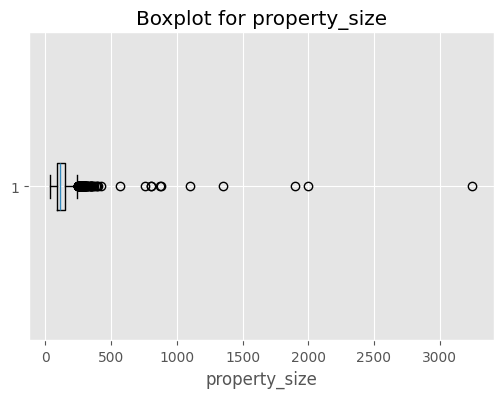

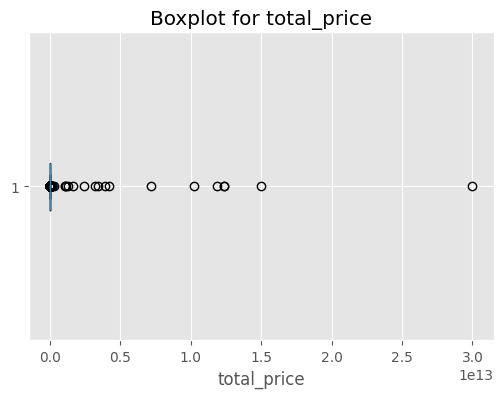

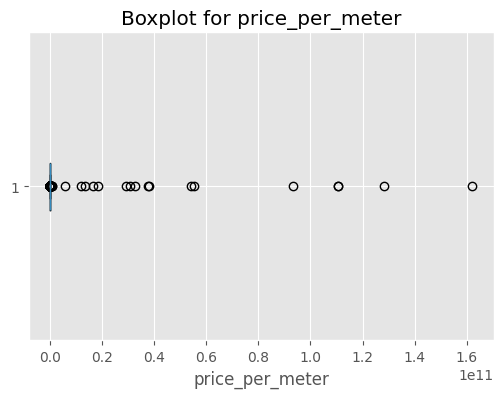

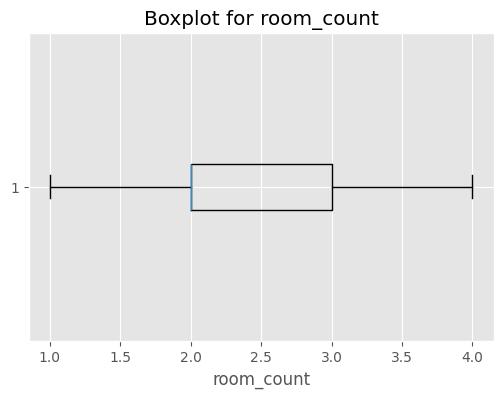

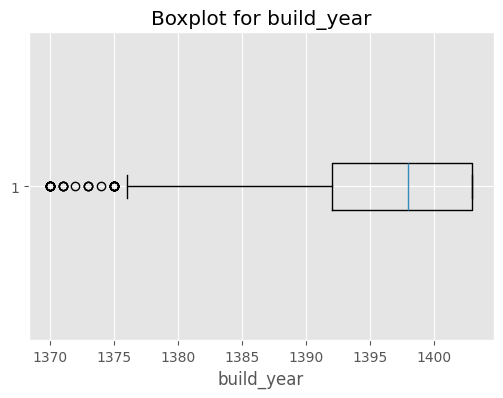

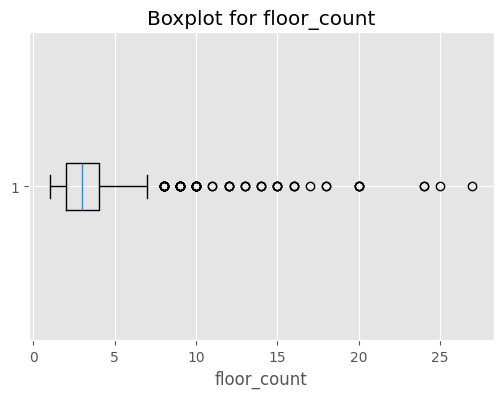

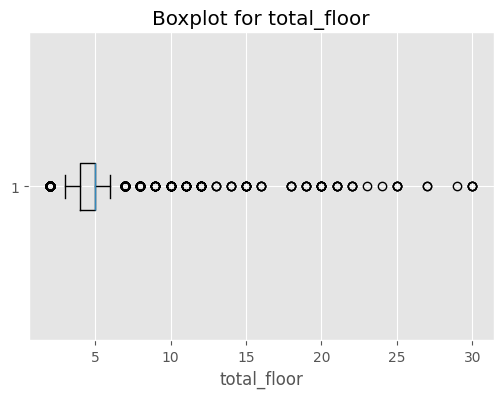

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


numeric_columns = ['property_size', 'total_price', 'price_per_meter', 'room_count', 'build_year', 'floor_count', 'total_floor']
df_numeric = clean_df3[numeric_columns].dropna()

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = ((df_numeric < lower_bound) | (df_numeric > upper_bound))


outlier_counts = outliers.sum()

print(outlier_counts)

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_numeric[column].dropna(), vert=False)
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)
    plt.show()


In [42]:

outlier_samples = df_numeric[outliers.any(axis=1)].sample(n=10, random_state=42)

# چاپ نمونه‌های مقادیر پرت
print(outlier_samples)

      property_size  total_price  price_per_meter  room_count  build_year  \
2682            210  21000000000        100000000           3        1390   
862             125  35000000000        280000000           2        1403   
5306            170   1800000000         10588235           2        1392   
6603            110   2651000000         24100000           2        1403   
1502             84  18300000000        217857000           2        1402   
2684             95   2850000000         30000000           2        1395   
1693             50   8000000000        160000000           1        1392   
1073            165  31350000000        190000000           3        1394   
6468             80   4800000000         60000000           1        1403   
464              95  18600000000        195789000           2        1403   

     floor_count total_floor  
2682           1           5  
862            4           5  
5306           2           2  
6603           6           7

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">

بخش ۱۱ - مصور سازی داده ها
<br><br>
برای این بخش من از کتابخانه matplotlib و seaborn استفاده کردم که هر دوی این کتابخانه ها جهت رسم نمودار و مصور سازی داده ها در پایتون هستند.
ابتدا کدی را جهت نمایش میانگین قیمت خانه ها بر حسب متر مربع برای هر شهر را نوشتم. فرایند این کد اینگونه است که ابتدا بر اساس شهر داده ها را گروه گروه می کند و سپس برای هر گروه میانگین را محاسبه میکند


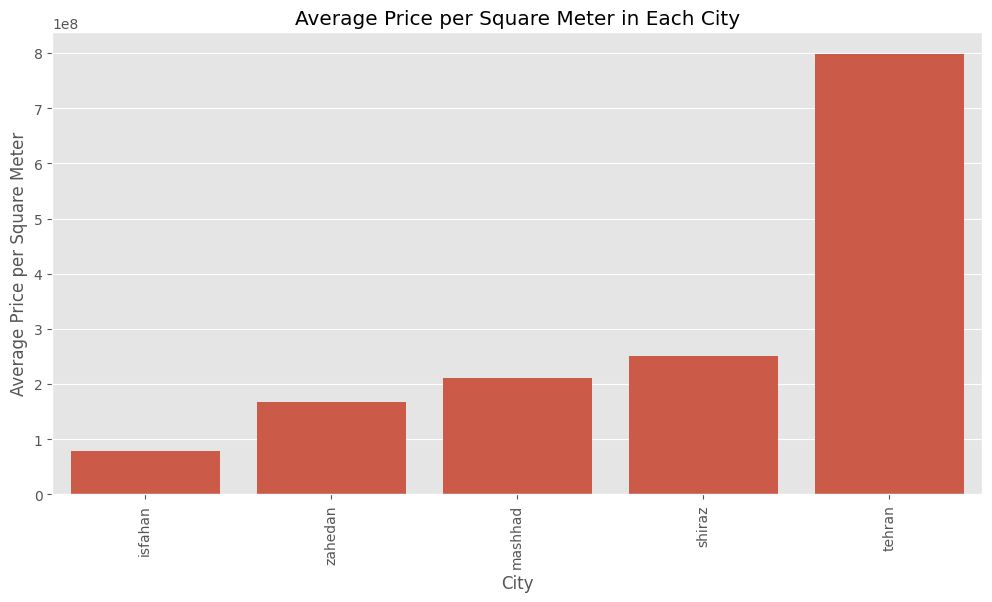

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
city_price_avg = clean_df3.groupby('city')['price_per_meter'].mean().sort_values()
sns.barplot(x=city_price_avg.index, y=city_price_avg.values)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Average Price per Square Meter")
plt.title("Average Price per Square Meter in Each City")
plt.show()


<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
برای قسمت بعد  من میخواستم میانگین قیمت بر متر مربع خانه ها را در هر سال نمایش دهم برای همین بجای هیستوگرام از linear plot استفاده کردم

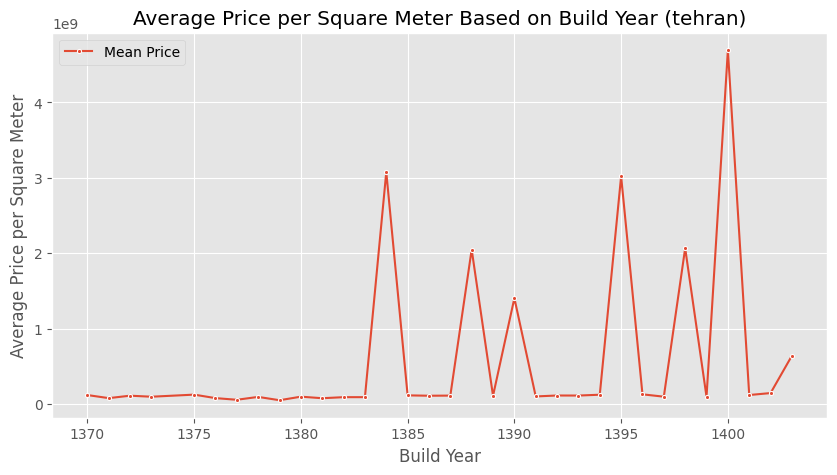

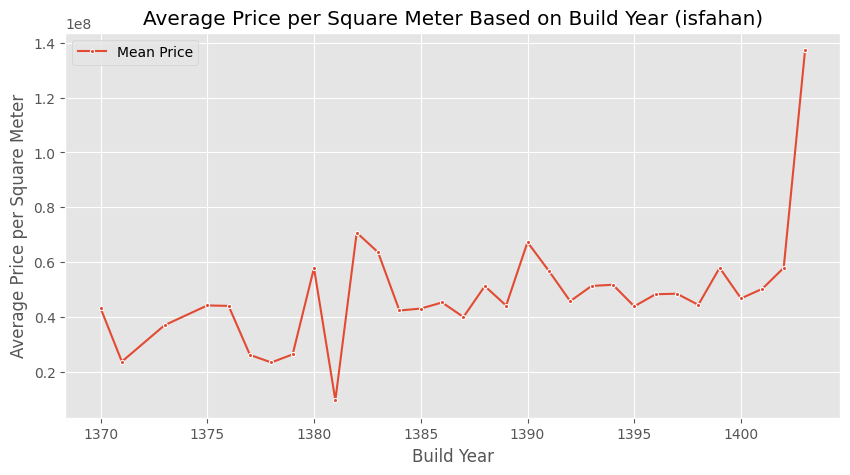

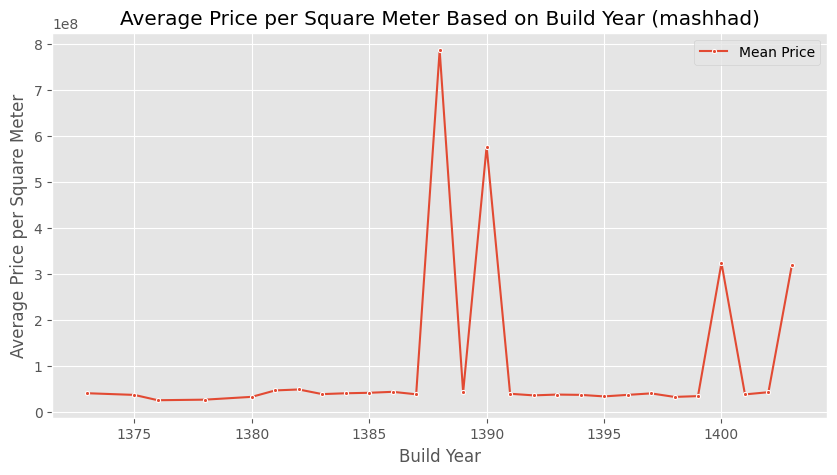

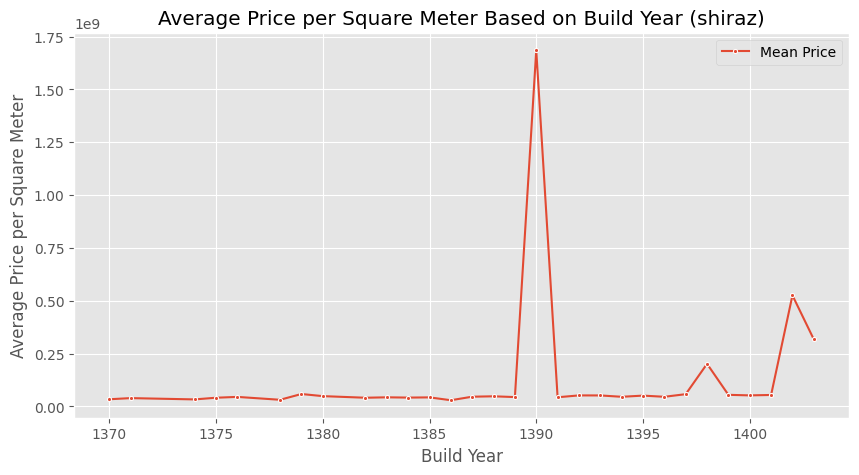

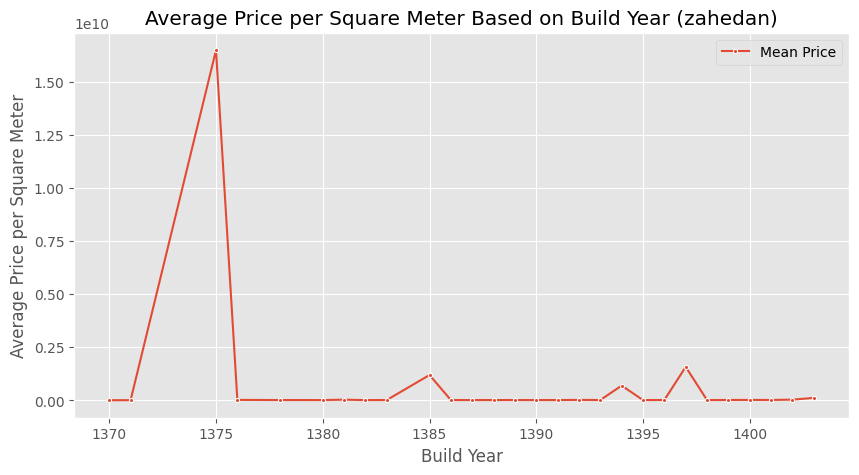

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.style.use("ggplot")


cities = clean_df3["city"].unique()


for city in cities:
    city_data = clean_df3[clean_df3["city"] == city]
    grouped_data = city_data.groupby("build_year")["price_per_meter"].mean().reset_index()


    if len(grouped_data) > 1:
        plt.figure(figsize=(10, 5))
        sns.lineplot(x="build_year", y="price_per_meter", data=grouped_data, marker=".", label="Mean Price")
        plt.xlabel("Build Year")
        plt.ylabel("Average Price per Square Meter")
        plt.title(f"Average Price per Square Meter Based on Build Year ({city})")
        plt.legend()
        plt.show()

<div dir="rtl" style="text-align: right;">
<p style="line-height: 1.8;">
سپس در مرحله بعدی توزیع برای سال ساخت خانه ها را برای هر شهر مصور کردم. در این قسمت نیز مانند قسمت های قبلی با استفاده از گروه کردن شهر های یکسان نمودار داده های آن ها را رسم کردم و در ادامه هم به همین روش توزیع تعداد اتاق ها را برای هر شهر مصور کردم.
در ادامه نمودارهای قیمت بر حسب متر مربع برای هر شهر را رسم کردم، در این قسمت به دلیل بالا بودن scale و مقیاس قیمت ها اول سعی کردم با استفاده از نمودار لگاریتمی و یا نرمال سازی داده ها نمودار هر بخش رو رسم کنم اما نتیجه نداشت و شکل نمودار شکل درستی نبود، از طرفی با توجه به اینکه کمینه و بیشنیه قیمت ها در مقیاس لگاریتمی خیلی فاصله ای نداشتند، نمودار لگاریتمی هم نتیجه بخش نبود. به همین دلیل داده های پرت را بر اساس صدک ۱ و ۹۹ دور ریختم و مقیاس بندی نمودار را هم با استفاده از histogram_bin_edge انجام دادم و برای قیمت کل هم به همین شکل عمل کردم.

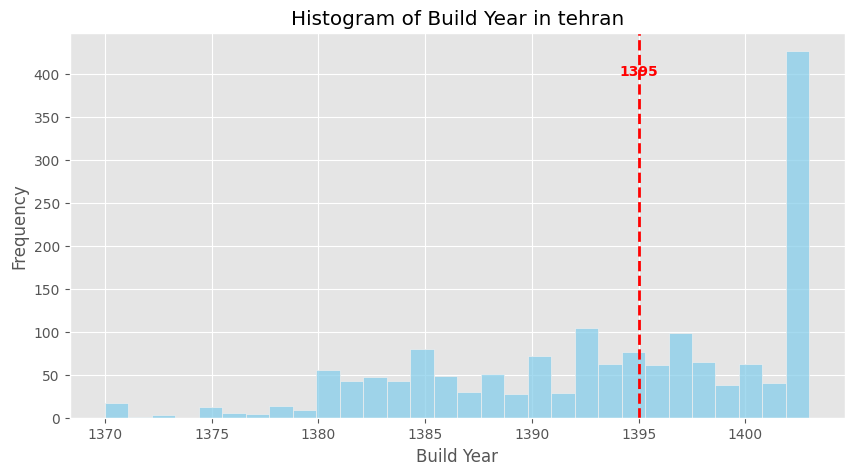

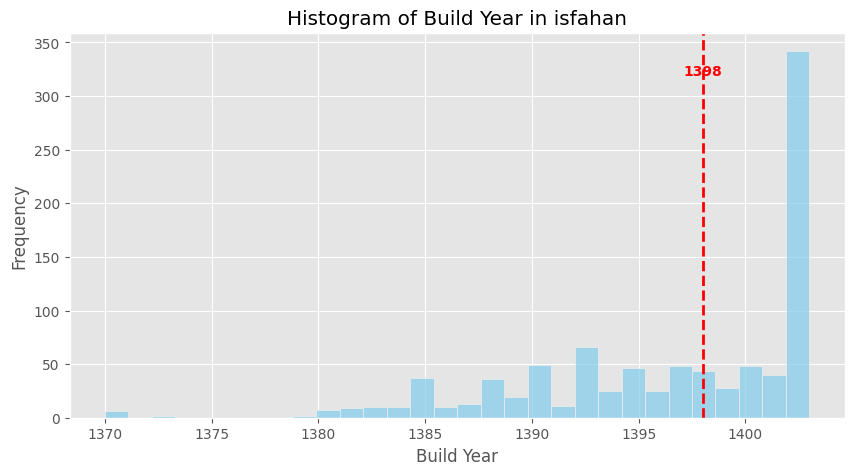

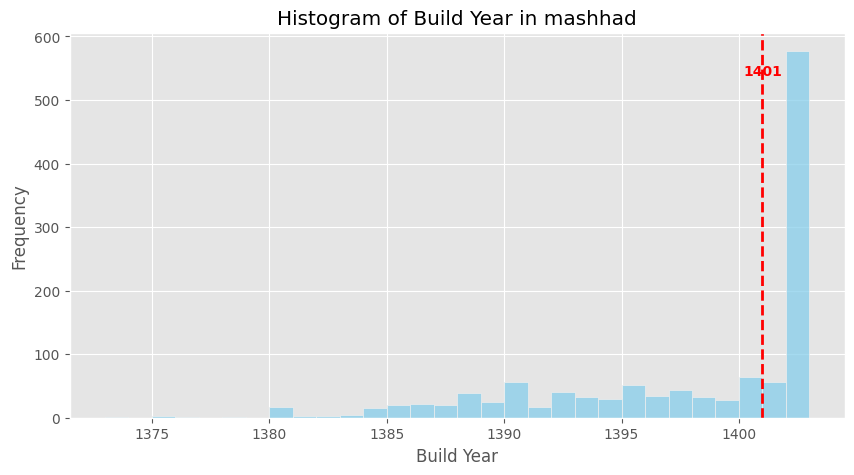

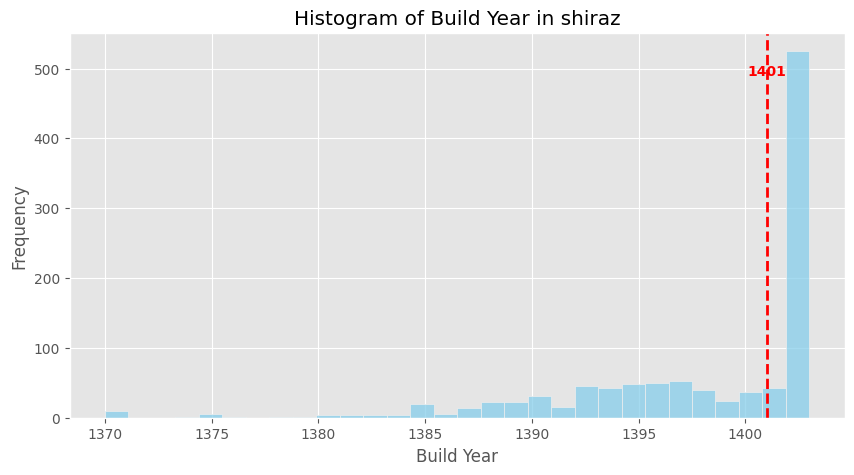

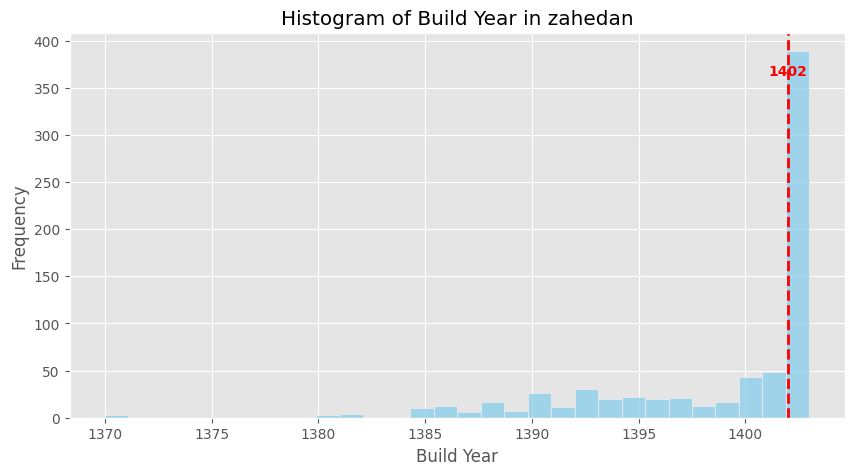

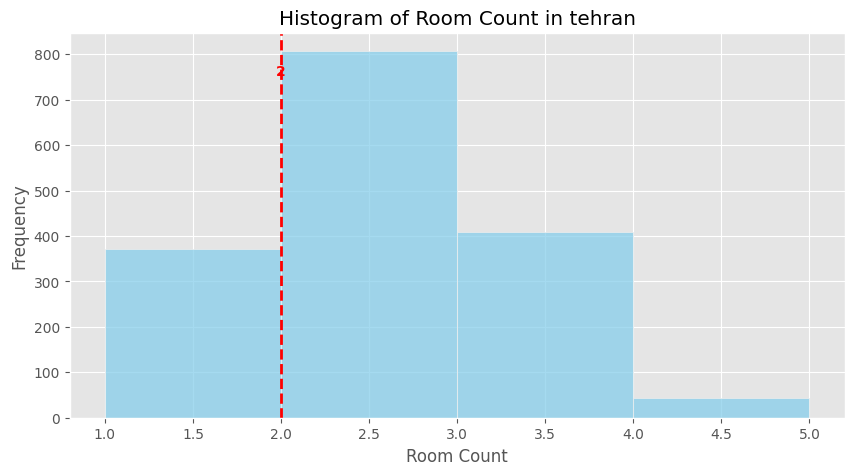

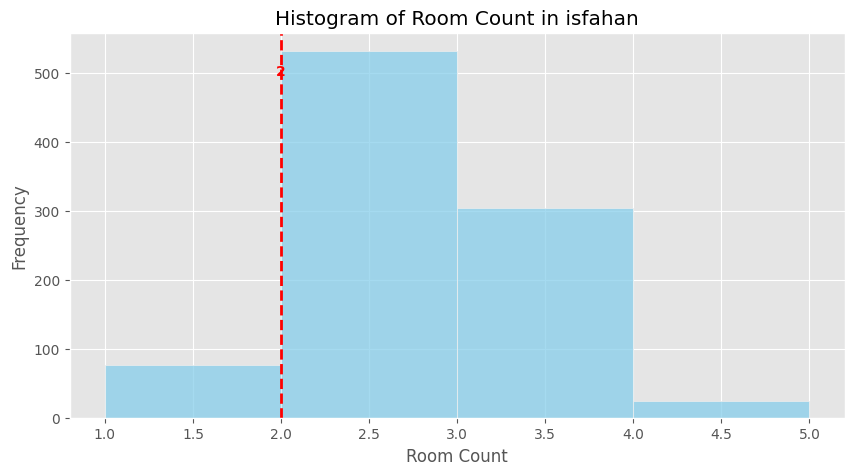

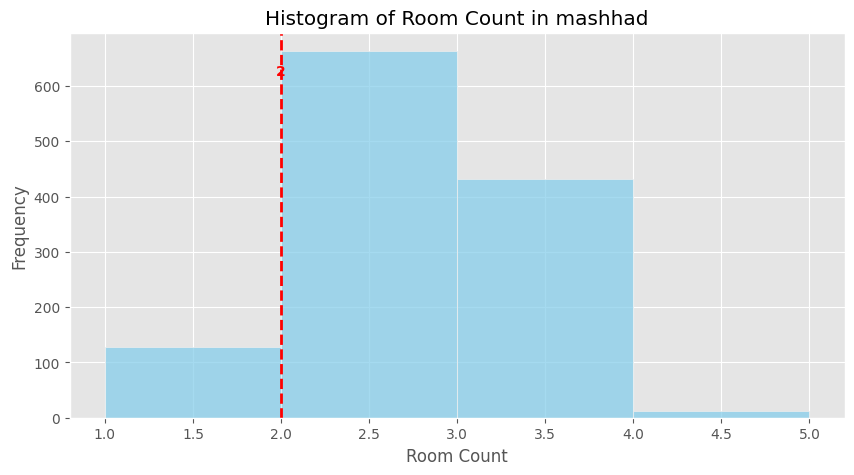

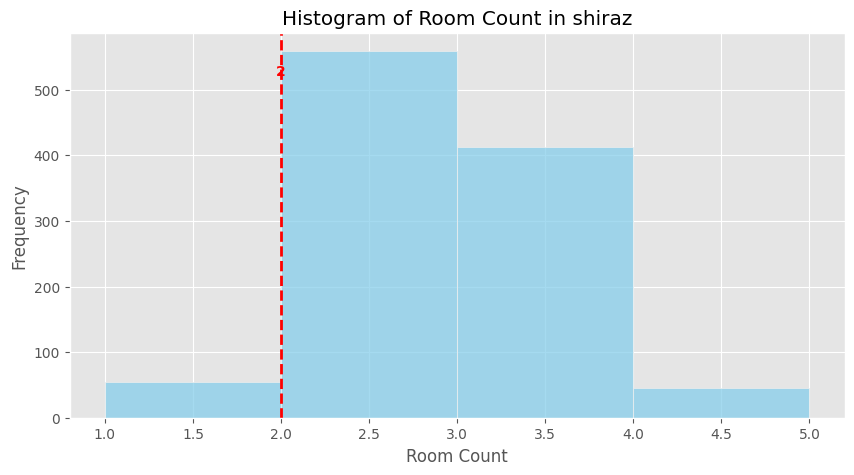

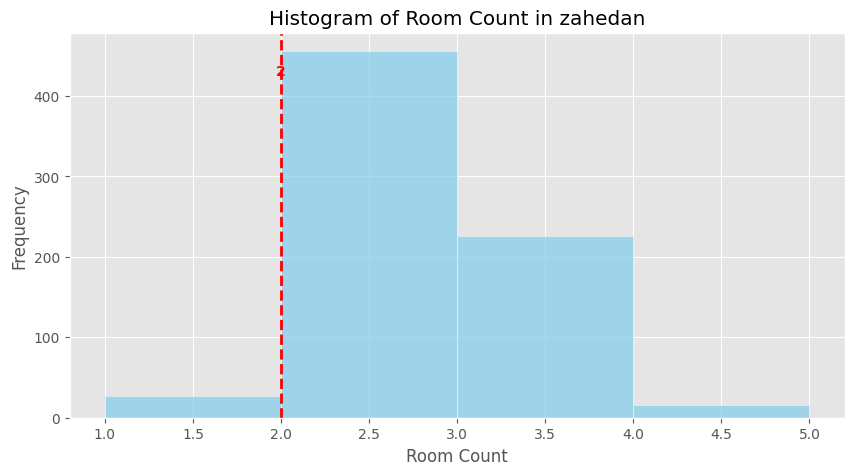

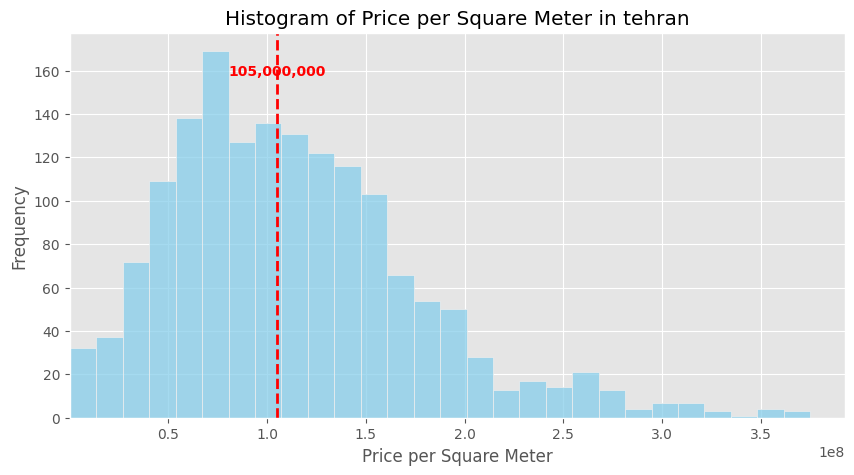

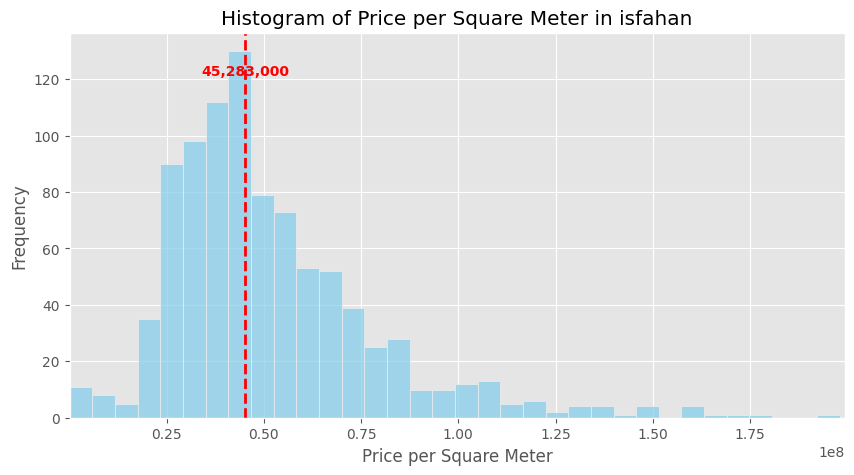

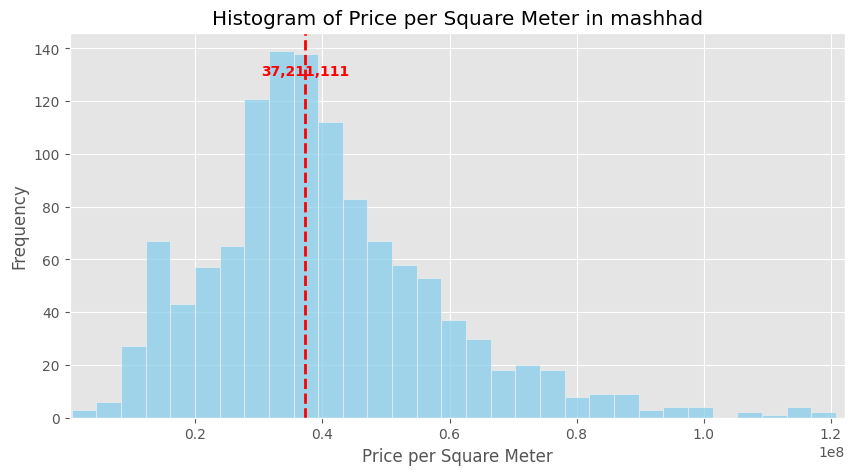

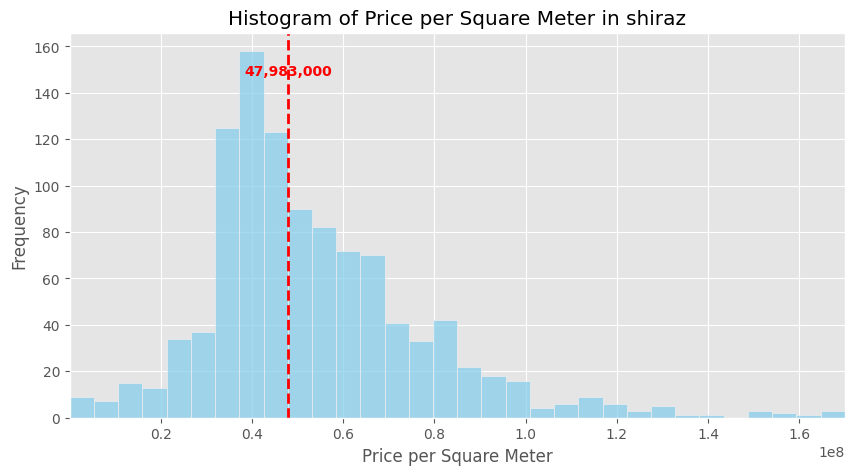

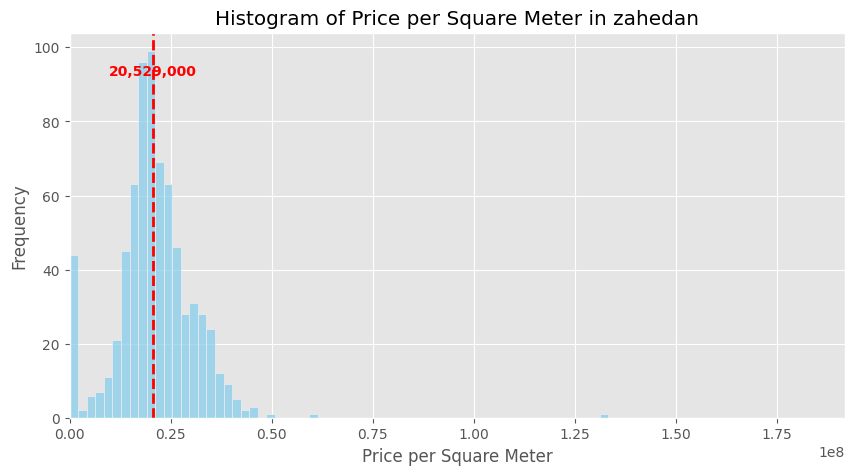

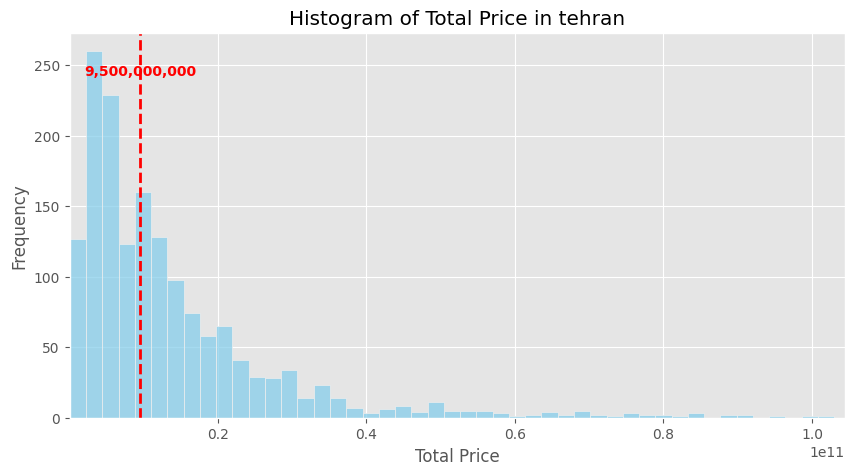

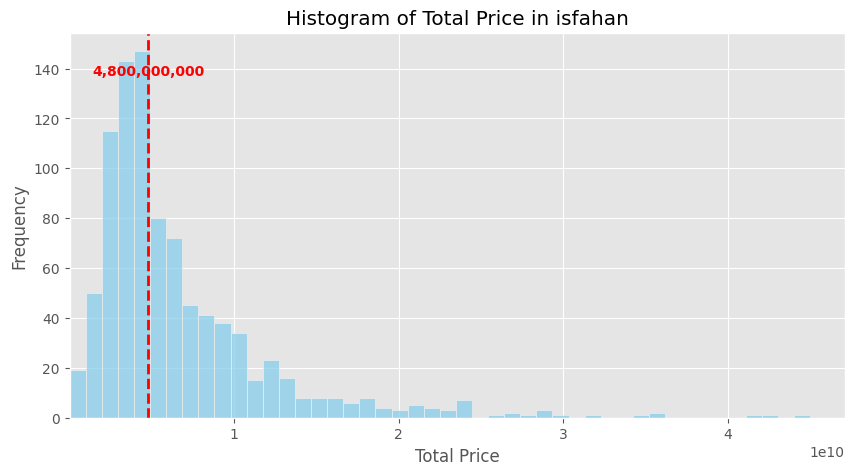

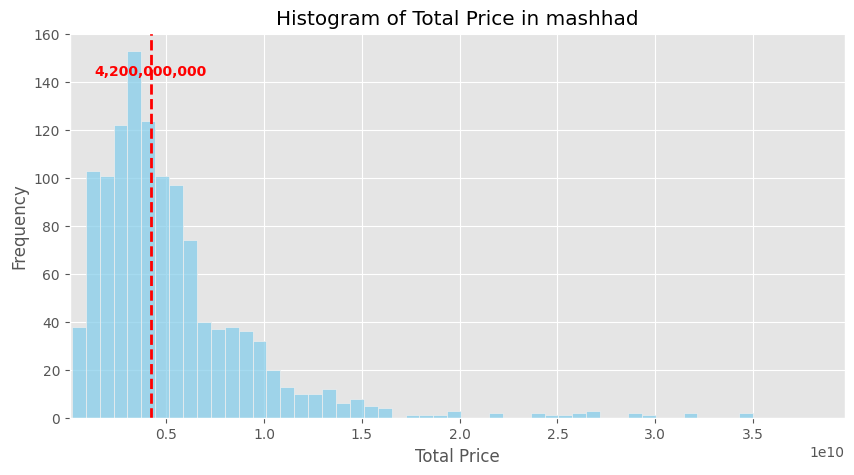

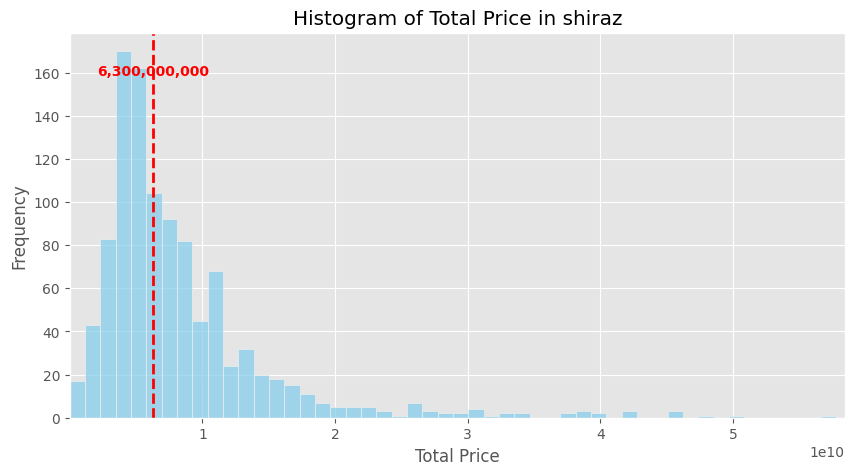

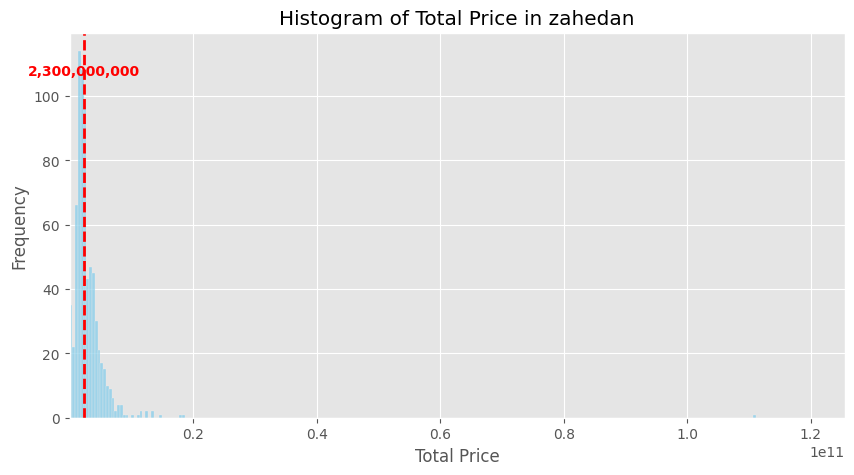

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("ggplot")


cities = clean_df3["city"].unique()


for city in cities:
    city_data = clean_df3[clean_df3["city"] == city]["build_year"].dropna()

    if len(city_data) > 0:
        plt.figure(figsize=(10, 5))
        sns.histplot(city_data, bins=30, kde=False, color="skyblue")

        median_value = np.median(city_data)
        plt.axvline(median_value, color="red", linestyle="dashed", linewidth=2)
        plt.text(median_value, plt.ylim()[1] * 0.9, f'{median_value:.0f}',
                 ha='center', va='center', fontweight='bold', fontsize=10, color='red')

        plt.xlabel("Build Year")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Build Year in {city}")
        plt.show()


for city in cities:
    city_data = clean_df3[clean_df3["city"] == city]["room_count"].dropna()

    if len(city_data) > 0:
        plt.figure(figsize=(10, 5))
        bins = range(1, int(city_data.max()) + 2)
        sns.histplot(city_data, bins=bins, kde=False, color="skyblue")

        median_value = np.median(city_data)
        plt.axvline(median_value, color="red", linestyle="dashed", linewidth=2)
        plt.text(median_value, plt.ylim()[1] * 0.9, f'{median_value:.0f}',
                 ha='center', va='center', fontweight='bold', fontsize=10, color='red')

        plt.xlabel("Room Count")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Room Count in {city}")
        plt.show()


for city in cities:
    city_data = clean_df3[clean_df3["city"] == city]["price_per_meter"].dropna()

    if len(city_data) > 0:
        plt.figure(figsize=(10, 5))

        # حذف داده‌های پرت بر اساس صدک 1 و 99
        q1, q99 = np.percentile(city_data, [1, 99])
        city_data_filtered = city_data[(city_data >= q1) & (city_data <= q99)]

        # تعیین تعداد بهینه bins
        bins = np.histogram_bin_edges(city_data_filtered, bins="auto")

        # رسم هیستوگرام
        sns.histplot(city_data_filtered, bins=bins, kde=False, color="skyblue")

        # محاسبه میانه و نمایش روی نمودار
        median_value = np.median(city_data_filtered)
        plt.axvline(median_value, color="red", linestyle="dashed", linewidth=2)
        plt.text(median_value, plt.ylim()[1] * 0.9, f'{median_value:,.0f}',
                 ha='center', va='center', fontweight='bold', fontsize=10, color='red')

        # تنظیم محور X بر اساس داده‌های واقعی (بدون داده‌های پرت)
        plt.xlim(q1, q99)

        plt.xlabel("Price per Square Meter")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Price per Square Meter in {city}")
        plt.show()

for city in cities:
    city_data = clean_df3[clean_df3["city"] == city]["total_price"].dropna()

    if len(city_data) > 0:
        plt.figure(figsize=(10, 5))

        # حذف داده‌های پرت بر اساس صدک 1 و 99
        q1, q99 = np.percentile(city_data, [1, 99])
        city_data_filtered = city_data[(city_data >= q1) & (city_data <= q99)]

        # تعیین تعداد بهینه bins
        bins = np.histogram_bin_edges(city_data_filtered, bins="auto")

        # رسم هیستوگرام
        sns.histplot(city_data_filtered, bins=bins, kde=False, color="skyblue")

        # محاسبه میانه و نمایش روی نمودار
        median_value = np.median(city_data_filtered)
        plt.axvline(median_value, color="red", linestyle="dashed", linewidth=2)
        plt.text(median_value, plt.ylim()[1] * 0.9, f'{median_value:,.0f}',
                 ha='center', va='center', fontweight='bold', fontsize=10, color='red')

        # تنظیم محور X بر اساس داده‌های واقعی (بدون داده‌های پرت)
        plt.xlim(q1, q99)

        plt.xlabel("Total Price")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Total Price in {city}")
        plt.show()

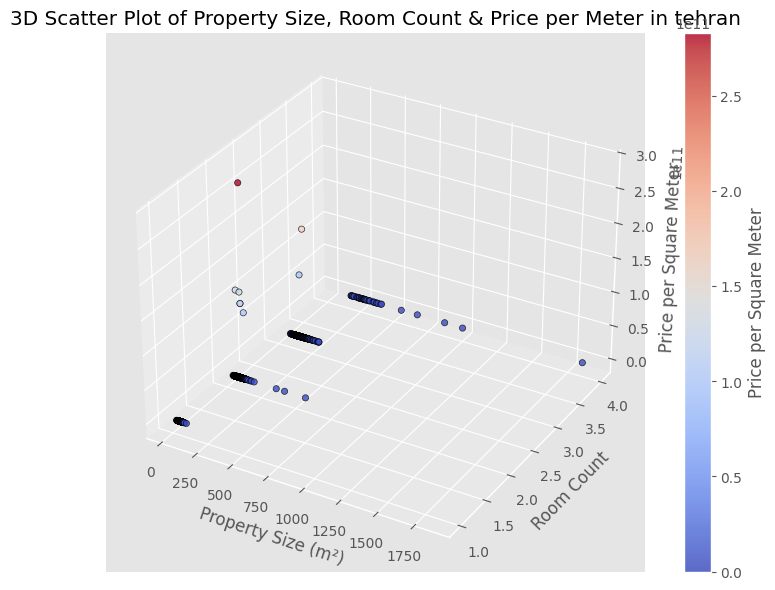

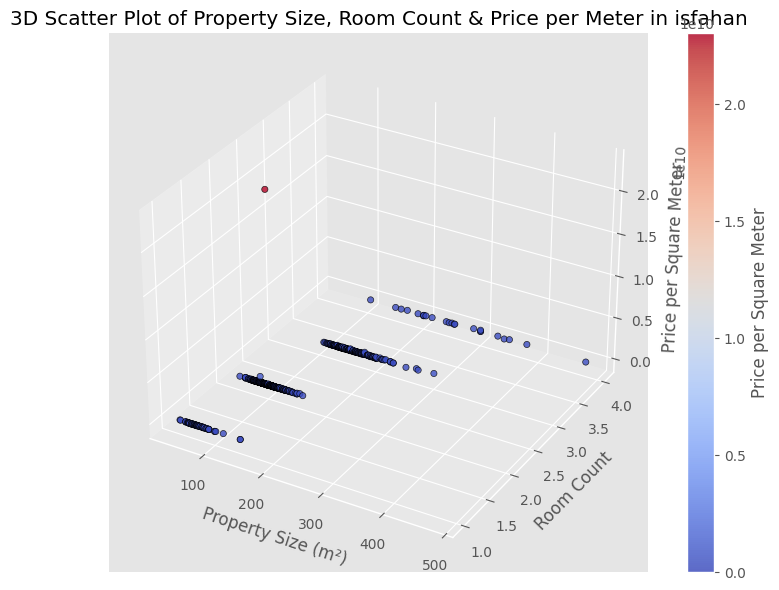

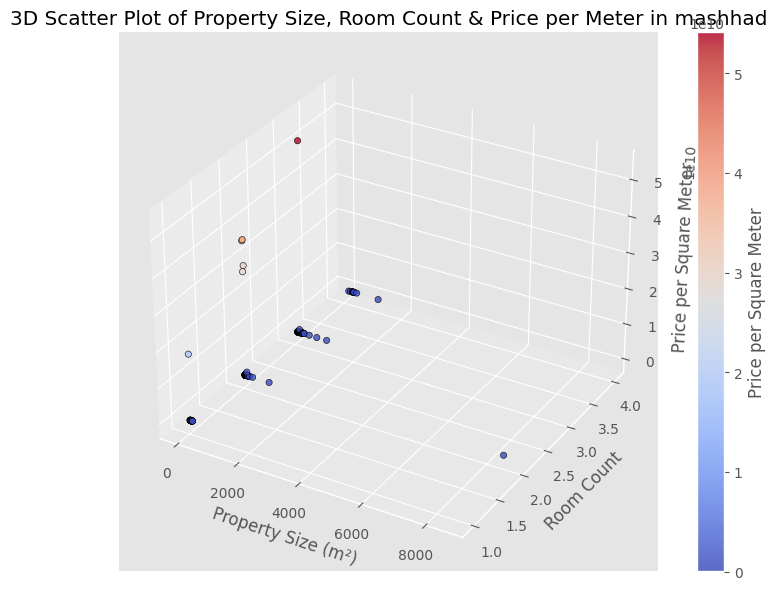

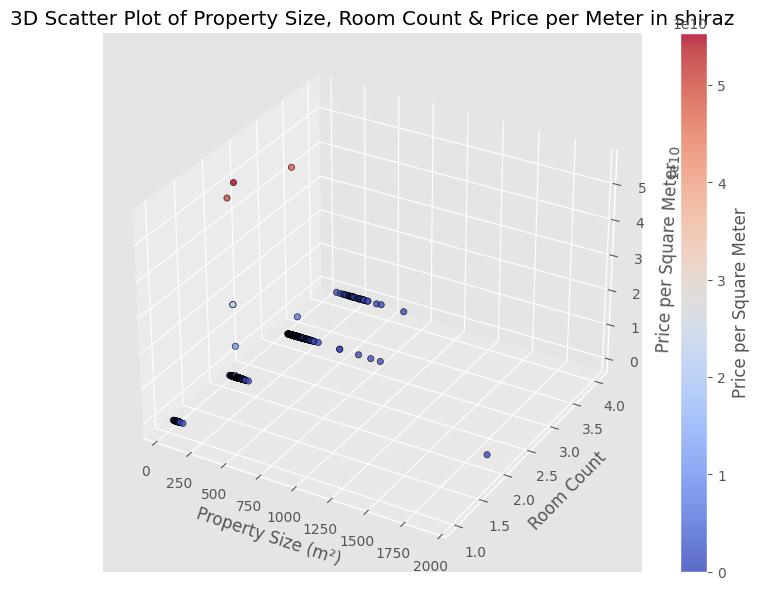

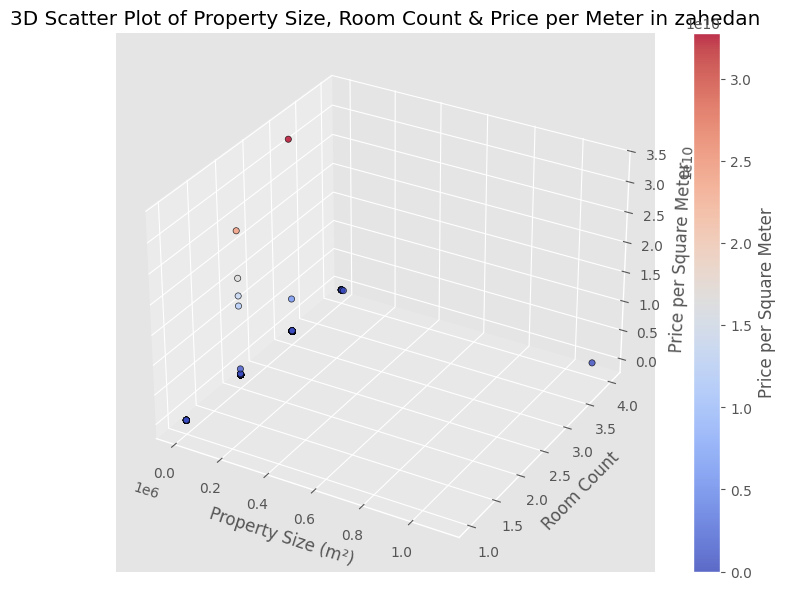

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# تنظیمات کلی
plt.style.use("ggplot")

# دریافت لیست شهرها
cities = clean_df3["city"].unique()

# 📌 رسم نمودار برای هر شهر
for city in cities:
    city_data = clean_df3[clean_df3["city"] == city].dropna(subset=["room_count", "property_size", "price_per_meter"])

    if len(city_data) > 0:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # رسم نمودار سه‌بعدی
        scatter = ax.scatter(
            city_data["property_size"],  # محور X: مساحت خانه
            city_data["room_count"],  # محور Y: تعداد اتاق
            city_data["price_per_meter"],  # محور Z: قیمت هر متر مربع
            c=city_data["price_per_meter"],  # رنگ بر اساس قیمت
            cmap="coolwarm", alpha=0.8, edgecolors="k"
        )

        # برچسب‌گذاری محورها
        ax.set_xlabel("Property Size (m²)")
        ax.set_ylabel("Room Count")
        ax.set_zlabel("Price per Square Meter")
        ax.set_title(f"3D Scatter Plot of Property Size, Room Count & Price per Meter in {city}")

        # اضافه کردن نوار رنگی
        fig.colorbar(scatter, ax=ax, label="Price per Square Meter")

        # نمایش نمودار
        plt.show()